# Amazon Sales Data : Price EDA
---
## 데이터 로드 및 검토

In [2]:
import pandas as pd
import requests

amazon_df = pd.read_csv('../../data/amazon.csv')

In [3]:
amazon_df.head(2)

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...

---
## 데이터 전처리
### 1. Price 단위 변환
- 루피(₹) -> 원(₩)

In [4]:
# discount_price와 actual_price 컬럼에서 '₹'와 ','를 제거하고 실수형으로 변환
price_cols = ['discounted_price', 'actual_price']
amazon_df[price_cols] = amazon_df[price_cols].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [5]:
# discount_percentage 컬럼에서 '%'를 제거하고 실수형으로 변환
amazon_df['discount_percentage'] = amazon_df['discount_percentage'].replace('%', '', regex=True).astype(float)

In [6]:
def fetch_exchange_rates(base_currency):
    """
    API를 호출하여 환율 정보를 가져와 exchange_rates에 저장
    :param base_currency: 기준 통화 코드 (예: 'USD')
    """
    global exchange_rates
    response = requests.get(f'https://api.exchangerate-api.com/v4/latest/{base_currency}')
    
    if response.status_code == 200:
        exchange_rates = response.json()['rates']
    else:
        return 'API 호출 실패, Status code :', response.status_code


def exchange_rate(amount, from_currency, to_currency):
    """
    주어진 금액을 from_currency에서 to_currency로 변환
    :param amount: 변환할 금액
    :param from_currency: 변환할 통화의 코드 (예: 'USD')
    :param to_currency: 결과 통화의 코드 (예: 'EUR')
    :return: 변환된 금액
    """
    if not exchange_rates:
        fetch_exchange_rates(to_currency)
    try:
        if from_currency not in exchange_rates or to_currency not in exchange_rates:
            raise ValueError("잘못된 통화 코드입니다.")
        converted_amount = (amount / exchange_rates[from_currency]) * exchange_rates[to_currency]
        return round(converted_amount, 2)
    except Exception as e:
        print(f"오류 발생: {e}")
        return None

In [7]:
# 함수 테스트
fetch_exchange_rates('USD')  
exchange_rate(10, 'USD', 'KRW')

13617.8

In [8]:
# API 호출
fetch_exchange_rates('KRW')

# dataframe에 적용할 함수
def convert_currency(row, col):
    return exchange_rate(row[col], 'INR', 'KRW')

# DataFrame에 환율 변환 결과 추가
amazon_df['discounted_price_KRW'] = amazon_df.apply(lambda row: convert_currency(row, 'discounted_price'), axis=1).astype(int)
amazon_df['actual_price_KRW'] = amazon_df.apply(lambda row: convert_currency(row, 'actual_price'), axis=1).astype(int)

In [9]:
amazon_df.head(2)

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   

   actual_price  discount_percentage rating rating_count  \
0        1099.0                 64.0    4.2       24,269   
1         349.0                 43.0    4.0       43,994   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  discounted_price_KRW  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...                  6456   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...                  3220   

   actual_price_KRW  
0             17783  
1              5647

#### + 데이터에 있는 discounted_percentage는 정확한걸까?

In [10]:
check_df = amazon_df.copy()

def calculate_discount_percentage(row):
    original_price = row['actual_price_KRW']
    discounted_price = row['discounted_price_KRW']
    
    if original_price <= 0:
        return 0
        
    discount_percentage = ((original_price - discounted_price) / original_price) * 100
    return round(discount_percentage)

check_df['calculate_ds_percentage'] = check_df.apply(calculate_discount_percentage, axis=1)

# amazon_df[['discount_percentage', 'calculate_ds_percentage']]
check_df.query('discount_percentage != calculate_ds_percentage')

product_id                                       product_name  \
817  B08WD18LJZ  TVARA LCD Writing Tablet 8.5 Inch E-Note Pad L...   

                                              category  discounted_price  \
817  Computers&Accessories|Accessories&Peripherals|...             249.0   

     actual_price  discount_percentage rating rating_count  \
817         600.0                 59.0    4.0        1,208   

                                         about_product  \
817  Perfect for kids, students and businessman. Gr...   

                                               user_id  \
817  AFNCX33YXD6T4LAWBFYXN6RR7LZQ,AGOJ5KXS5VV6NQS3X...   

                                             user_name  \
817  Uthiranathan,Scuba_3d,Amazon Customer,archana,...   

                                             review_id  \
817  R3SIBLYM5T5AFY,R1YQKXTIBLGEMJ,R2XT2VFFBQ2UR1,R...   

                                          review_title  \
817  Product is good,Lots of fun for the price,Good...   

                                        review_content  \
817  Product is good. But the brightness is not tha...   

                                              img_link  \
817  https://m.media-amazon.com/images/I/518mUXLlFZ...   

                                          product_link  discounted_price_KRW  \
817  https://www.amazon.in/TVARA-Writing-Tablet-Inc...                  4029   

     actual_price_KRW  calculate_ds_percentage  
817              9708                       58

---
### 2. null값, 이상값 전처리
- null값 제거
- rating행의 이상값 '|'는 중간값인 3.0으로 대체

In [11]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1465 non-null   object 
 1   product_name          1465 non-null   object 
 2   category              1465 non-null   object 
 3   discounted_price      1465 non-null   float64
 4   actual_price          1465 non-null   float64
 5   discount_percentage   1465 non-null   float64
 6   rating                1465 non-null   object 
 7   rating_count          1463 non-null   object 
 8   about_product         1465 non-null   object 
 9   user_id               1465 non-null   object 
 10  user_name             1465 non-null   object 
 11  review_id             1465 non-null   object 
 12  review_title          1465 non-null   object 
 13  review_content        1465 non-null   object 
 14  img_link              1465 non-null   object 
 15  product_link         

In [12]:
# discounted_price_KRW 컬럼에서 null 값인 행 필터링
amazon_df[amazon_df['rating_count'].isnull()]

product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category  discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...             199.0   
324  Computers&Accessories|Accessories&Peripherals|...             249.0   

     actual_price  discount_percentage rating rating_count  \
282         999.0                 80.0    3.0          NaN   
324         999.0                 75.0    5.0          NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  💎[The Fastest Charge] - This iPhone USB C cabl...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ  Abdul Gafur  RQXD5SAMMPC6L   

                                     review_title  \
282  The cable works but is not 65W as advertised   
324                               Awesome Product   

                                        review_content  \
282  I have a pd supported car charger and I bought...   
324  Quick delivery.Awesome ProductPacking was good...   

                                              img_link  \
282  https://m.media-amazon.com/images/W/WEBP_40237...   
324  https://m.media-amazon.com/images/I/31-q0xhaTA...   

                                          product_link  discounted_price_KRW  \
282  https://www.amazon.in/Amazon-Brand-Charging-Su...                  3220   
324  https://www.amazon.in/REDTECH-Lightning-Certif...                  4029   

     actual_price_KRW  
282             16165  
324             16165

In [13]:
# null값 제외
amazon_df = amazon_df[amazon_df['rating_count'].notnull()]
amazon_df = amazon_df.reset_index().drop(columns=('index'))

- 리뷰를 남긴 사용자가 한 명뿐인 것으로 보임. 결측치가 포함된 행은 제거

In [14]:
# 숫자가 아닌 값을 포함한 행 필터링
non_numeric_ratings = amazon_df[~amazon_df['rating'].str.replace('.', '', regex=False).str.isnumeric()]
non_numeric_ratings

product_id                                       product_name  \
1277  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   

                                               category  discounted_price  \
1277  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...            2099.0   

      actual_price  discount_percentage rating rating_count  \
1277        2499.0                 16.0      |          992   

                                          about_product  \
1277  No Installation is provided for this product|1...   

                                                user_id  \
1277  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...   

                                              user_name  \
1277  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   

                                              review_id  \
1277  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...   

                                           review_title  \
1277  Decent product,doesn't pick up sand,Ok ok,Must...   

                                         review_content  \
1277  Does the job well,doesn't work on sand. though...   

                                               img_link  \
1277  https://m.media-amazon.com/images/W/WEBP_40237...   

                                           product_link  discounted_price_KRW  \
1277  https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...                 33964   

      actual_price_KRW  
1277             40436

In [15]:
amazon_df.loc[amazon_df['rating'].str.contains('|', regex=False), 'rating'] = 3.0

- 별점을 매긴 사용자 수는 많지만 별점 값이 숫자가 아님. 중간값인 3.0으로 대체

In [16]:
amazon_df['rating'] = amazon_df['rating'].astype(float)
amazon_df['rating_count'] = amazon_df['rating_count'].str.replace(',','').astype(int)

---
### 3. 중복값 제거

In [17]:
# 최유리님 코드 참고
print("데이터프레임 전체 기준 중복 데이터 여부: ", amazon_df.duplicated().any()) 
print("Product_id 기준 중복 데이터 여부: ", amazon_df['product_id'].duplicated().any())

데이터프레임 전체 기준 중복 데이터 여부:  False
Product_id 기준 중복 데이터 여부:  True


- DataFrame 기준으로는 중복 데이터가 없지만 product_id 기준으로는 중복 데이터가 존재한다.

In [18]:
amazon_df.sort_values('product_id').head(2)

product_id                                       product_name  \
46   B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
879  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   

                                              category  discounted_price  \
46   Computers&Accessories|NetworkingDevices|Networ...             507.0   
879  Computers&Accessories|NetworkingDevices|Networ...             507.0   

     actual_price  discount_percentage  rating  rating_count  \
46         1208.0                 58.0     4.1          8131   
879        1208.0                 58.0     4.1          8131   

                                         about_product  \
46   Connects your computer to a high-speed wireles...   
879  Connects your computer to a high-speed wireles...   

                                               user_id  \
46   AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...   
879  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...   

                                             user_name  \
46   nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...   
879  nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...   

                                             review_id  \
46   R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...   
879  R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...   

                                          review_title  \
46   good tool to use for,Brand is always good,Over...   
879  good tool to use for,Brand is always good,Over...   

                                        review_content  \
46   good quality tool from d linkWiFi signal is go...   
879  good quality tool from d linkWiFi signal is go...   

                                              img_link  \
46   https://m.media-amazon.com/images/I/31+NwZ8gb1...   
879  https://m.media-amazon.com/images/W/WEBP_40237...   

                                          product_link  discounted_price_KRW  \
46   https://www.amazon.in/D-Link-DWA-131-Wireless-...                  8203   
879  https://www.amazon.in/D-Link-DWA-131-Wireless-...                  8203   

     actual_price_KRW  
46              19546  
879             19546

In [19]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../..')))

import prep_functions

prep_functions.compare_two_rows(amazon_df, 46, 879)


Comparing row 46 and row 879:
  img_link:
    Row 46: https://m.media-amazon.com/images/I/31+NwZ8gb1L._SX300_SY300_.jpg
    Row 879: https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31+NwZ8gb1L._SX300_SY300_.jpg
  product_link:
    Row 46: https://www.amazon.in/D-Link-DWA-131-Wireless-Adapter-Black/dp/B002PD61Y4/ref=sr_1_50?qid=1672909126&s=electronics&sr=1-50
    Row 879: https://www.amazon.in/D-Link-DWA-131-Wireless-Adapter-Black/dp/B002PD61Y4/ref=sr_1_327?qid=1672903011&s=computers&sr=1-327


- 해당 notebook에서 진행하는 price_EDA에 img_link, product_link는 큰 의미가 없다고 판단하여 product_id, product_name, discounted_price_KRW, actual_price_KRW 해당 컬럼의 값이 중복되는 행은 가장 마지막 행을 두고 삭제하기로 결정

In [20]:
# 중복 행 제거 (product_id, product_name, discounted_price_KRW, actual_price_KRW 기준)
amazon_df = amazon_df.drop_duplicates(subset=['product_id', 'product_name', 'discounted_price_KRW', 'actual_price_KRW'], keep='last')

In [21]:
amazon_df.sort_values('product_id').head(5)

product_id                                       product_name  \
879  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
143  B002SZEOLG  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
719  B003B00484  Duracell Plus AAA Rechargeable Batteries (750 ...   
722  B003L62T7W  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   
732  B004IO5BMQ  Logitech M235 Wireless Mouse, 1000 DPI Optical...   

                                              category  discounted_price  \
879  Computers&Accessories|NetworkingDevices|Networ...             507.0   
143  Computers&Accessories|NetworkingDevices|Networ...             749.0   
719  Electronics|GeneralPurposeBatteries&BatteryCha...             399.0   
722  Computers&Accessories|Accessories&Peripherals|...             279.0   
732  Computers&Accessories|Accessories&Peripherals|...             699.0   

     actual_price  discount_percentage  rating  rating_count  \
879        1208.0                 58.0     4.1          8131   
143        1339.0                 44.0     4.2        179692   
719         499.0                 20.0     4.3         27201   
722         375.0                 26.0     4.3         31534   
732         995.0                 30.0     4.5         54405   

                                         about_product  \
879  Connects your computer to a high-speed wireles...   
143  150 Mbps Wi-Fi —— Exceptional wireless speed u...   
719  Duracell Rechargeable AAA 750mAh batteries sta...   
722  A comfortable, ambidextrous shape feels good i...   
732  You can surf the Web with more comfort and eas...   

                                               user_id  \
879  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...   
143  AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...   
719  AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...   
722  AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...   
732  AGIOL4B6EPMZ63RZQFWZWI33O2EA,AG33OJYQIXPPS7CON...   

                                             user_name  \
879  nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...   
143  Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...   
719  T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...   
722  Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...   
732  Chandrashekar SK,Mohammed Ashfaque,Arif Hussai...   

                                             review_id  \
879  R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...   
143  R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...   
719  R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...   
722  R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...   
732  R28ZB0YUM6FKKB,RNB44LXBJIPTL,RVSWATRY0CJIV,R3I...   

                                          review_title  \
879  good tool to use for,Brand is always good,Over...   
143  Works on linux for me. Get the model with ante...   
719  Works Good,Perfect replacement cell for trimme...   
722  Handy Mouse,Good quality mouse,Good one.,Good,...   
732  Good silent mouse,Too small to hold!,Reviewing...   

                                        review_content  \
879  good quality tool from d linkWiFi signal is go...   
143  I use this to connect an old PC to internet. I...   
719  Works good,Bought it to replace my Phillips QT...   
722  Liked this Product,https://m.media-amazon.com/...   
732  It's little small for big hands. But best avai...   

                                              img_link  \
879  https://m.media-amazon.com/images/W/WEBP_40237...   
143  https://m.media-amazon.com/images/I/31Wb+A3VVd...   
719  https://m.media-amazon.com/images/I/418YrbHVLC...   
722  https://m.media-amazon.com/images/I/31iFF1Kbkp...   
732  https://m.media-amazon.com/images/I/31CtVvtFt+...   

                                          product_link  discounted_price_KRW  \
879  https://www.amazon.in/D-Link-DWA-131-Wireless-...                  8203   
143  https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...                 12119   
719  https://www.amazon.in/Duracell-AAA-750mAh-Rech...     

In [22]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1353 entries, 2 to 1462
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1353 non-null   object 
 1   product_name          1353 non-null   object 
 2   category              1353 non-null   object 
 3   discounted_price      1353 non-null   float64
 4   actual_price          1353 non-null   float64
 5   discount_percentage   1353 non-null   float64
 6   rating                1353 non-null   float64
 7   rating_count          1353 non-null   int64  
 8   about_product         1353 non-null   object 
 9   user_id               1353 non-null   object 
 10  user_name             1353 non-null   object 
 11  review_id             1353 non-null   object 
 12  review_title          1353 non-null   object 
 13  review_content        1353 non-null   object 
 14  img_link              1353 non-null   object 
 15  product_link          1353

- 전처리 후 기존 1465개의 행에서 1353개의 행으로 데이터 줄어듬

---
### 카테고리별 할인 가격과 할인율 분포
- Big category 추출

In [23]:
amazon_df.loc[:, 'big_category'] = amazon_df['category'].apply(lambda x: x.split('|')[0])

In [24]:
amazon_df.loc[:, 'small_category'] = amazon_df['category'].apply(lambda x: x.split('|')[-2])

In [25]:
cols = ['big_category', 'discount_percentage', 'discounted_price_KRW', 'actual_price_KRW']
category_price = amazon_df[cols]

In [26]:
category_price['big_category'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [27]:
category_price.head(2)

big_category  discount_percentage  discounted_price_KRW  \
2  Computers&Accessories                 90.0                  3220   
8  Computers&Accessories                 50.0                  8074   

   actual_price_KRW  
2             30728  
8             16165

#### big category별 할인 가격과 할인율 분포

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [29]:
# 카테고리 별 데이터 개수 체크
big_category_count = category_price.groupby('big_category').size().reset_index(name='count')
big_category_count.sort_values('count', ascending=False, inplace=True)
big_category_count

big_category  count
2            Electronics    493
4           Home&Kitchen    448
1  Computers&Accessories    374
7         OfficeProducts     31
5        HomeImprovement      2
6     MusicalInstruments      2
0          Car&Motorbike      1
3    Health&PersonalCare      1
8             Toys&Games      1

In [30]:
def discount_percentage_scatterplot(data, x='discounted_price_KRW', y='discount_percentage', hue='big_category'):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=x, y=y, hue=hue, data=data, palette='Set1')

    plt.xlabel('Discounted Price (KRW)')
    plt.ylabel('Discount Percentage')

    # 단위 축소 비활성화
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    ax.ticklabel_format(style='plain', axis='x')

    plt.legend(title='Big Category')
    plt.show()

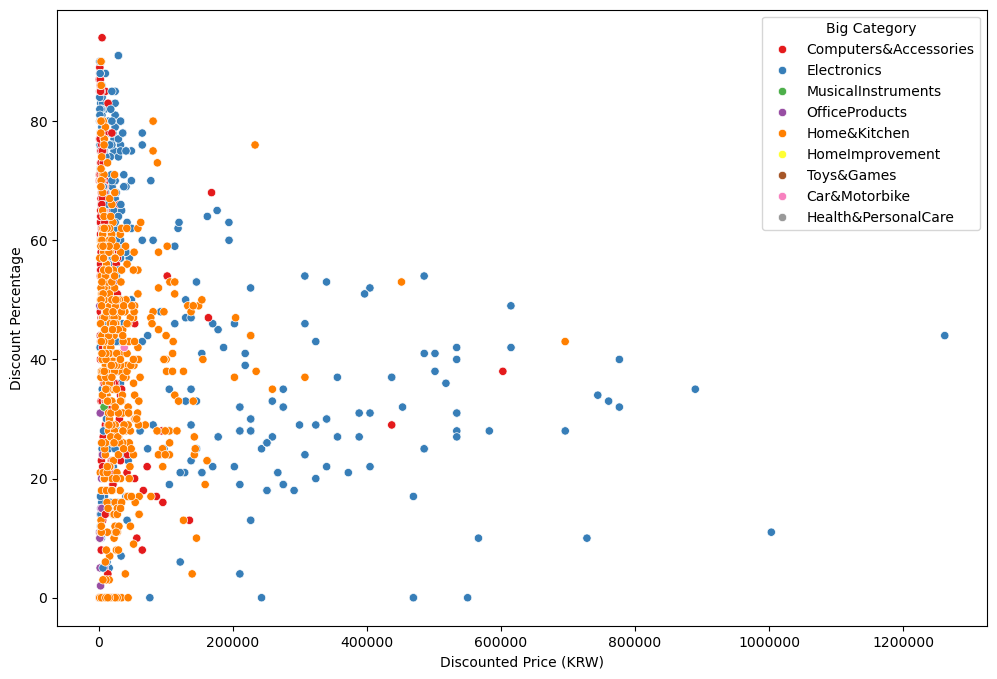

In [31]:
discount_percentage_scatterplot(category_price)

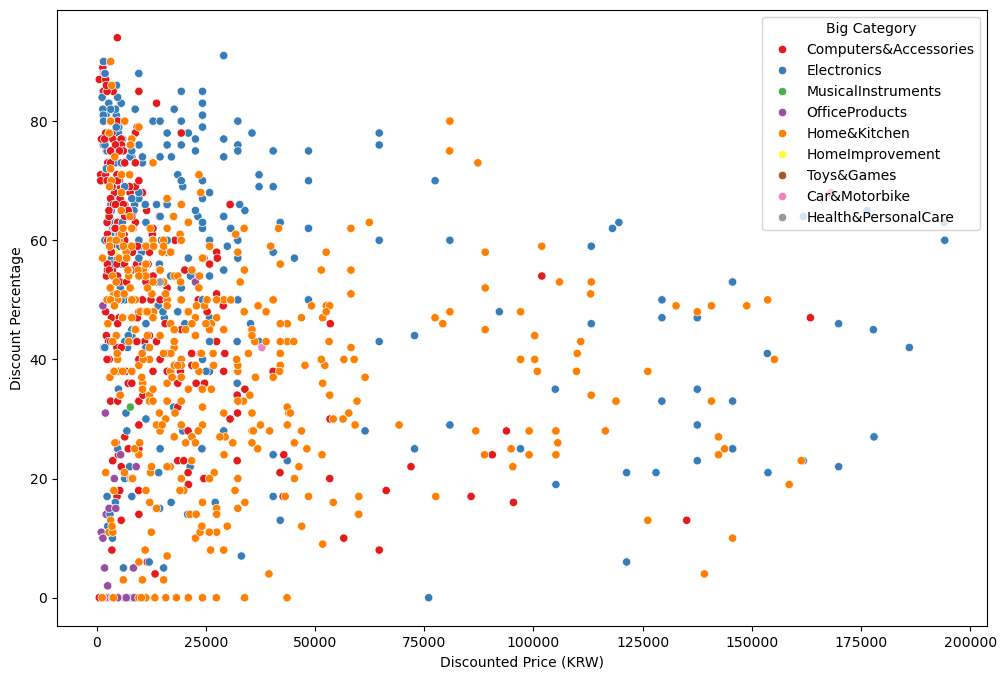

In [32]:
# 위 그래프에서 가장 많아 보이는 0 ~ 200000 범위만 확대해보기
filtered_df = category_price[(category_price['discounted_price_KRW'] >= 0) & (category_price['discounted_price_KRW'] <= 200000)]
discount_percentage_scatterplot(filtered_df)

- Computers&Accessories 카테고리는 낮은 가격대에 분포되어있다.
- Electonics 카테고리는 할인된 가격이 다른 카테고리에 비해 높고 할인율이 고루 분포되어 있지만 할인된 가격이 낮은 상품은 할인율이 60~90%에 밀집된 부분이 있다.
- Home&Kitchen 카테고리는 할인율이 고루 분포되어 있지만 40~80%에 밀집된 부분이 있다.
- OfficeProducts 카테고리는 데이터량이 적다. 대부분 낮은 가격대와 낮은 할인율을 가지고 있다.

---
### 수치형 데이터의 상관관계

In [33]:
# 수치형 데이터 Dataframe 생성
cols = ['actual_price_KRW','discounted_price_KRW','discount_percentage','rating','rating_count']
df = amazon_df[cols]

/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


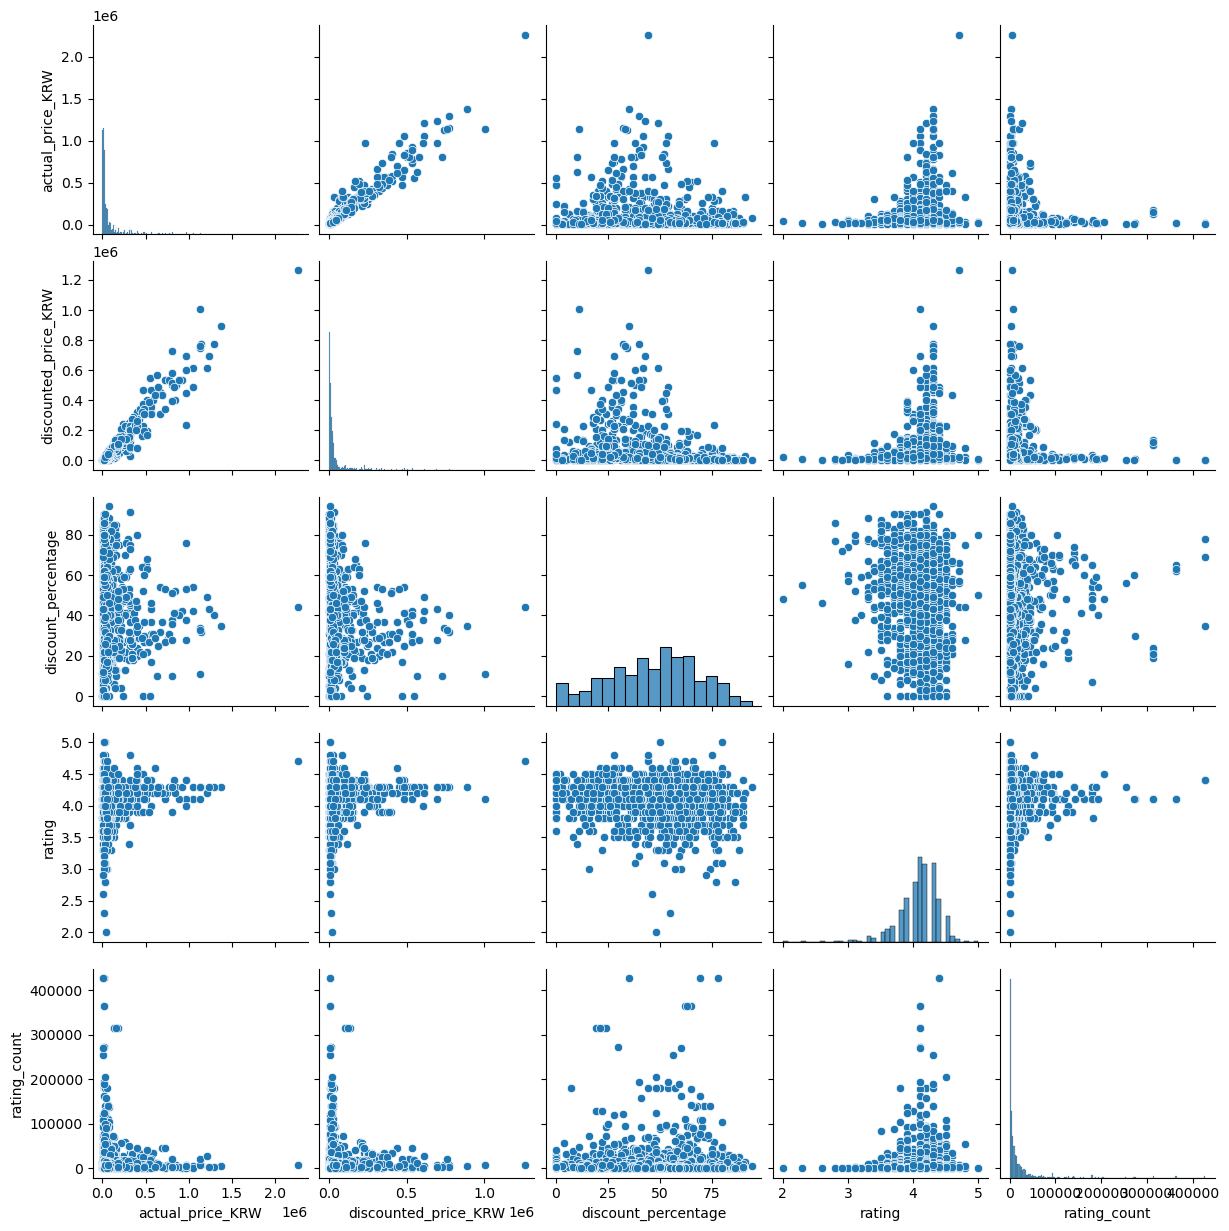

In [34]:
sns.pairplot(df)
plt.show()

- rating_count와 다른 변수간 뚜렷한 관계가 보이지 않으며 제품의 가격 또는 할인 가격, 할인율과 평점을 매긴 구매자 수는 큰 관계가 없어보인다.

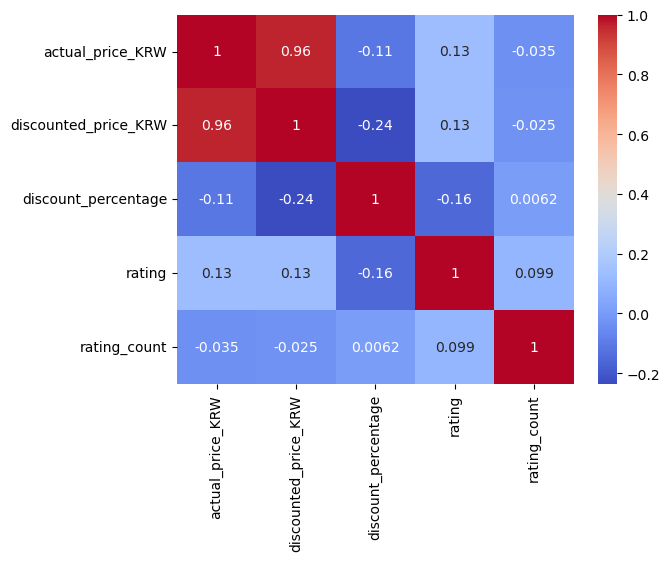

In [35]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

- 평점과 할인율 간 약한 음의 상관관계(-0.16)가 보인다. 할인율이 높을수록 평점이 낮아지는 경향이 보인다.
- 평점과 제품 가격 간 약한 양의 상관관계(0.13)가 보인다. 할인율과 달리 실제품 가격이 높을수록 평점이 높아지는 경향이 보인다.

---
#### 할인율이 높으면 평점이 낮다?

/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


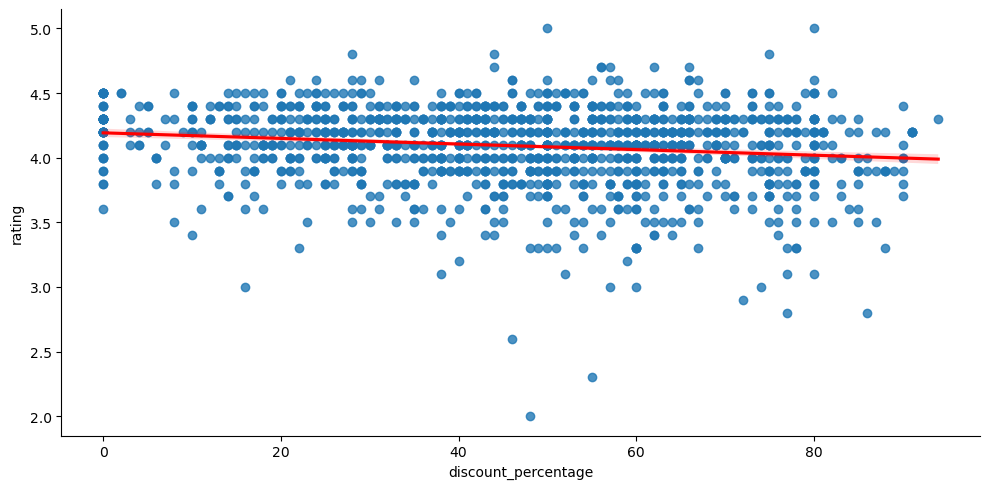

In [36]:
# 할인율과 평점 산점도와 회귀선
sns.lmplot(x='discount_percentage', y='rating', data=df, 
           height=5, aspect=2, 
           line_kws={'color': 'red'})
plt.show()


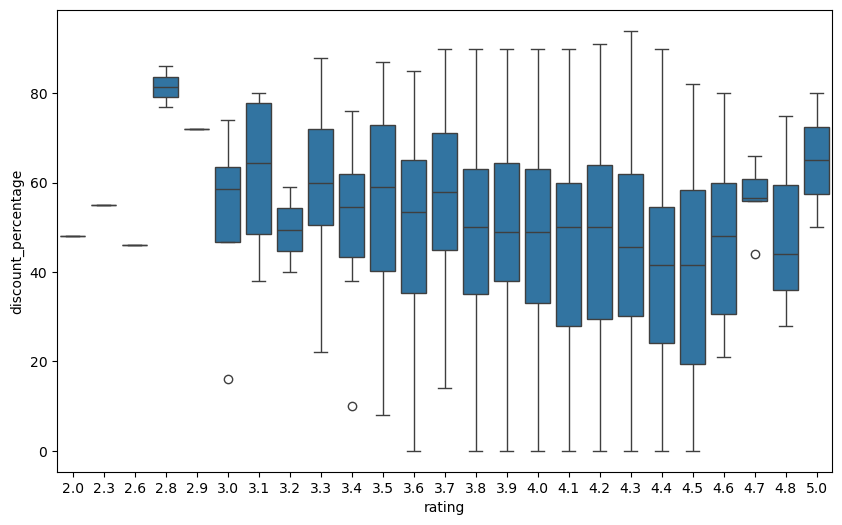

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='discount_percentage', data=df)
plt.show()

- 평점이 낮은 구간이 비교적 할인율이 큰 것으로 보인다.
- 특정 평점 구간(3.8~4.2)은 평균적으로 약 50%의 할인율이 적용된 것으로 보인다.

---
### 어떤 제품을 판매해야 좋을까

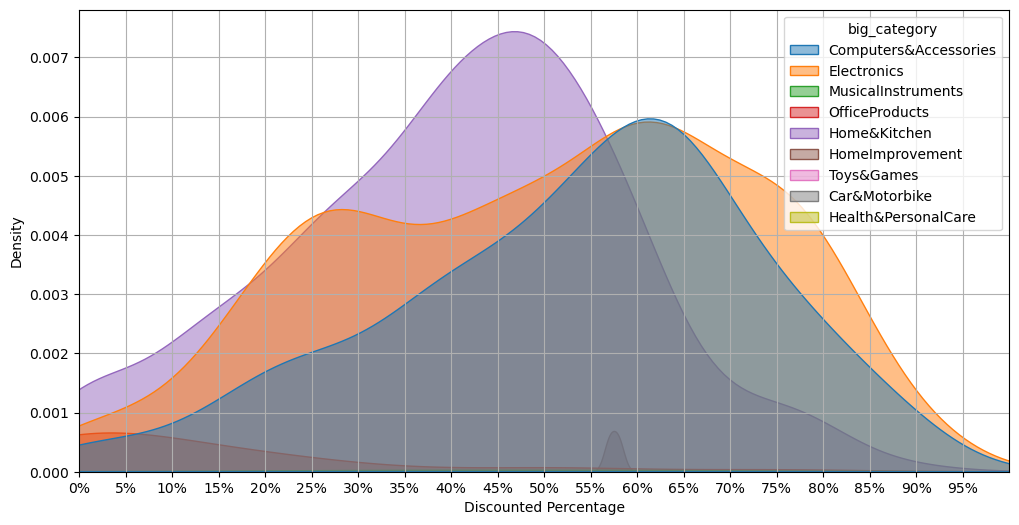

In [38]:
# 카테고리별 할인율의 확률 밀도
plt.figure(figsize=(12, 6))
sns.kdeplot(data=category_price, x='discount_percentage', hue='big_category', fill=True, alpha=0.5, warn_singular=False)
plt.xlabel('Discounted Percentage')
plt.xlim(0, 100)
ticks = range(0, 100, 5)
plt.xticks(ticks, [f'{tick}%' for tick in ticks])
plt.grid()
plt.show()

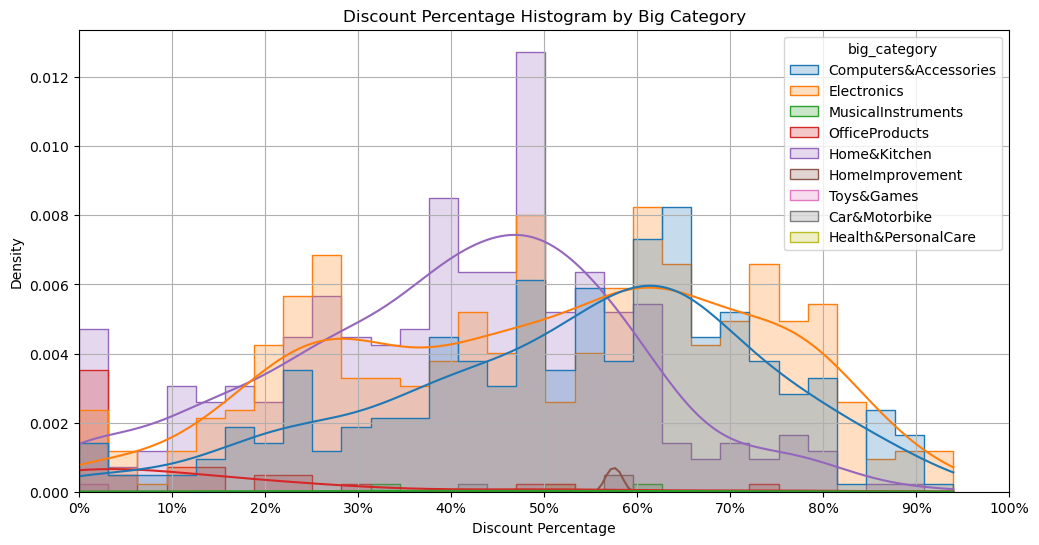

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(data=category_price, x='discount_percentage', hue='big_category', bins=30, kde=True, stat='density', element='step')
plt.title('Discount Percentage Histogram by Big Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Density')

plt.xlim(0, 100)
ticks = range(0, 101, 10)
plt.xticks(ticks, [f'{tick}%' for tick in ticks])

plt.grid()
plt.show()

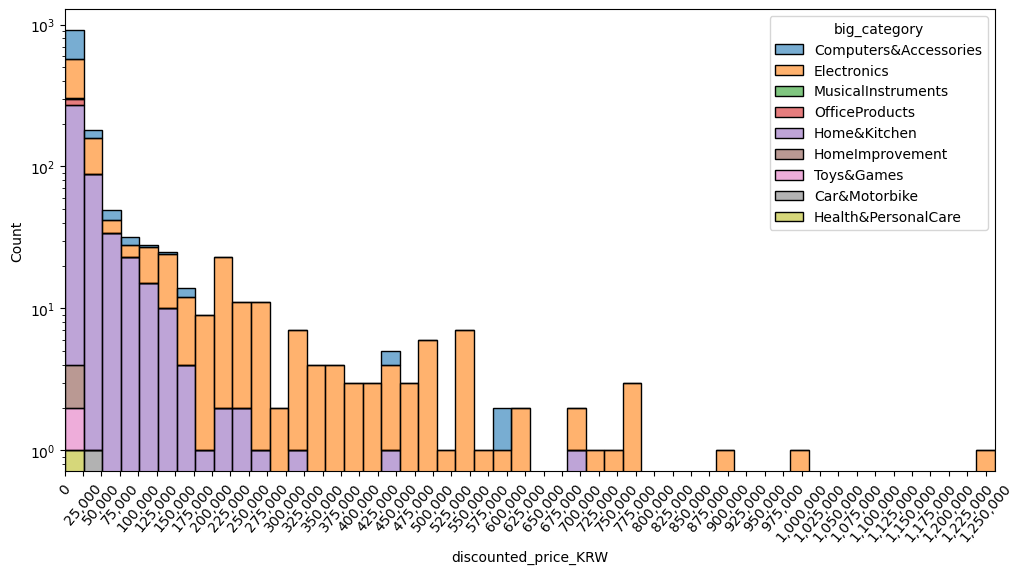

In [40]:
# 카테고리별 할인된 제품 가격의 분포
plt.figure(figsize=(12, 6))
sns.histplot(data=amazon_df, x='discounted_price_KRW', hue='big_category', multiple='stack', bins=50, alpha=0.6)
plt.xlim(0, amazon_df['discounted_price_KRW'].max())
ticks = range(0, amazon_df['discounted_price_KRW'].max(), 25000)
plt.xticks(ticks, [f'{tick:,}' for tick in ticks], rotation=50)
plt.yscale('log')
# plt.grid()
plt.show()

- Computers&Accessories 카테고리는 60~65%의 할인율의 빈도가 많으며 25000원 이내의 할인 가격이 약 1000개로 카테고리의 대부분 제품이 25,000원 이내에 판매 되고있다.
- Electronics 카테고리는 25~30%, 60~65%의 할인율의 빈도가 많으며 다양한 가격대에 제품이 판매 되고있다.
- OfficeProducts 카테고리는 가장 낮은 0~10%의 할인율의 빈도를 가지고 있으며 25000원 이내에 제품이 판매되고있다.
- Home&Kitchen 카테고리는 40~50%의 할인율의 빈도를 가지며 125,000원 이내에 카테고리의 제품이 판매 되고있다.
- 위 할인율의 빈도와 할인 가격의 분포로 보았을 때 Electronics 카테고리의 제품을 판매하는 것이 수익을 올릴 수 있을 것이라 예상된다.

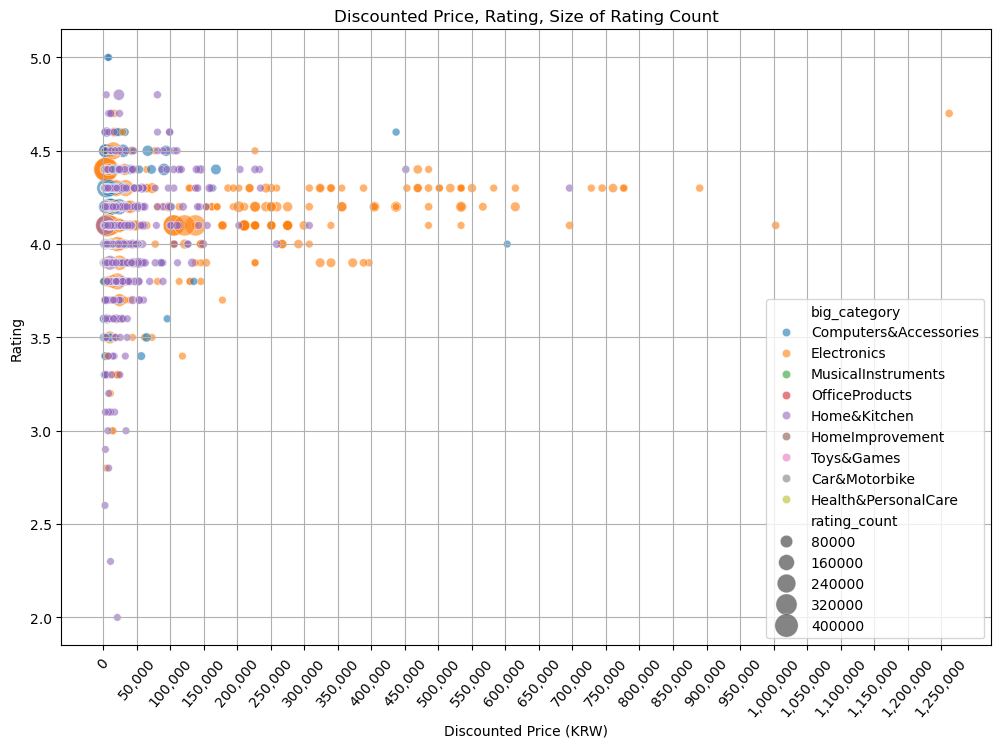

In [41]:
# 평점, 제품 할인가격과 평점을 남긴 사람 수의 산점도
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=amazon_df, 
    x='discounted_price_KRW', 
    y='rating', 
    hue='big_category', 
    size='rating_count', 
    sizes=(30, 300),
    alpha=0.6
)
plt.xlabel('Discounted Price (KRW)')
plt.ylabel('Rating')
plt.title('Discounted Price, Rating, Size of Rating Count')
ticks = range(0, amazon_df['discounted_price_KRW'].max(), 50000)
plt.xticks(ticks, [f'{tick:,}' for tick in ticks], rotation=50)
plt.grid(True)
plt.show()

---
### 군집화
- product_name(제품 이름), about_product(제품 설명)

In [42]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 불용어 다운로드
nltk.download('stopwords')

amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1353 entries, 2 to 1462
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1353 non-null   object 
 1   product_name          1353 non-null   object 
 2   category              1353 non-null   object 
 3   discounted_price      1353 non-null   float64
 4   actual_price          1353 non-null   float64
 5   discount_percentage   1353 non-null   float64
 6   rating                1353 non-null   float64
 7   rating_count          1353 non-null   int64  
 8   about_product         1353 non-null   object 
 9   user_id               1353 non-null   object 
 10  user_name             1353 non-null   object 
 11  review_id             1353 non-null   object 
 12  review_title          1353 non-null   object 
 13  review_content        1353 non-null   object 
 14  img_link              1353 non-null   object 
 15  product_link          1353

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yoorichoi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
cluster1_df = amazon_df.copy()

# 데이터가 가장 많은 카테고리 4개 / Electronics, Home&Kitchen, Computers&Accessories, OfficeProducts
# filter_category = big_category_count[:4]
# cluster1_df = cluster1_df[cluster1_df['big_category'].isin(filter_category['big_category'])]

# Electronics 카테고리 제외
# cluster1_df = cluster1_df[~cluster1_df['big_category'].isin(['Electronics'])]

# 카테고리 별 데이터 개수 체크
category_count = amazon_df.groupby('small_category').size().reset_index(name='count')
category_count.sort_values('count', ascending=False, inplace=True)
category_count = category_count[:10]
cluster1_df = cluster1_df[cluster1_df['small_category'].isin(category_count['small_category'])]

# 불용어 list
stop_text = set(stopwords.words('english'))

# 전처리 및 단어 리스트 만들기
def preprocess_and_split(text):
    text = text.lower() 
    text = re.sub(r'[\W\d]+', ' ', text).split()
    product_description = set(text) - stop_text
    return list(product_description)

# 제품 이름과 설명 list 생성
cluster1_df['name_words'] = cluster1_df['product_name'].apply(preprocess_and_split)
cluster1_df['description_words'] = cluster1_df['about_product'].apply(preprocess_and_split)

# 결과 확인
print(cluster1_df[['product_name', 'name_words', 'about_product', 'description_words']])

                                           product_name  \
2     Sounce Fast Phone Charging Cable & Data Sync U...   
16    MI 80 cm (32 inches) 5A Series HD Ready Smart ...   
24    Acer 80 cm (32 inches) I Series HD Ready Andro...   
26    OnePlus 80 cm (32 inches) Y Series HD Ready LE...   
38    OnePlus 126 cm (50 inches) Y Series 4K Ultra H...   
...                                                 ...   
1454  4 in 1 Handheld Electric Vegetable Cutter Set,...   
1456  Libra Room Heater for Home, Room Heaters Home ...   
1459  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1460  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1462  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                             name_words  \
2     [phone, cable, sync, sounce, devices, pro, x, ...   
16    [android, cm, tv, smart, led, black, mi, ready...   
24    [android, acer, cm, tv, smart, led, black, ar,...   
26    [android, oneplus, cm, smart, led, tv, black, ...

In [44]:
category_count

small_category  count
10                       Cables    191
82       SmallKitchenAppliances    137
83     Smartphones&BasicMobiles     77
89                  Televisions     66
97           WearableTechnology     64
38                   Headphones     60
0                   Accessories     52
50  Keyboards,Mice&InputDevices     50
76                  RoomHeaters     44
95         WaterHeaters&Geysers     44

In [45]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# K-Means 클러스터링을 위한 함수 정의
def cluster_KMeans(data, column_name, n_clusters=4):
    # NaN 값을 제외한 후 CountVectorizer로 단어 빈도 벡터화
    vectorizer = CountVectorizer()
    word_count_matrix = vectorizer.fit_transform(data[column_name].dropna())

    # Word Count Matrix를 DataFrame으로 변환
    word_count_df = pd.DataFrame(word_count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # PCA를 통해 차원 축소
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(word_count_df)
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
    
    # NaN 값 제외한 인덱스에 맞춰 big_category를 추가
    pca_df['small_category'] = data['small_category'].dropna().values

    # K-Means 클러스터링
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    pca_df['cluster'] = kmeans.fit_predict(pca_result)

    # 시각화
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=pca_df, x='PCA1', y='PCA2', hue='cluster', 
        palette='viridis', alpha=0.7, style='small_category', 
        markers=["o", "s", "D", "P"]
    )
    plt.grid()
    plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# K-Means 클러스터링을 위한 함수 정의
def cluster_TSNE(data, column_name, n_clusters=4):
    # NaN 값을 제외
    data_cleaned = data.dropna(subset=[column_name, 'small_category'])
    
    # CountVectorizer로 단어 빈도 벡터화
    vectorizer = CountVectorizer()
    word_count_matrix = vectorizer.fit_transform(data_cleaned[column_name])

    # Word Count Matrix를 DataFrame으로 변환
    word_count_df = pd.DataFrame(word_count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # 스케일링
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(word_count_df)

    # t-SNE 적용
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(scaled_data)

    # 결과를 DataFrame으로 변환
    tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
    
    # small_category 추가
    tsne_df['small_category'] = data_cleaned['small_category'].values

    # 클러스터링
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    tsne_df['cluster'] = hierarchical.fit_predict(tsne_result)

    # 시각화
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=tsne_df, x='TSNE1', y='TSNE2', hue='cluster', 
        palette='viridis', alpha=0.7, style='small_category', 
        legend='full'
    )
    
    # 범례 조정
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
    plt.title(f'Clustering of {column_name} using t-SNE and Hierarchical Clustering')
    plt.tight_layout()
    plt.show()

    return tsne_df

In [47]:
cluster1_df['combined_text'] = cluster1_df['name_words'].apply(lambda x: ' '.join(x)) + ' ' + cluster1_df['description_words'].apply(lambda x: ' '.join(x))
cluster1_df['name_words'] = cluster1_df['name_words'].apply(lambda x: ' '.join(x))
cluster1_df['description_words'] = cluster1_df['description_words'].apply(lambda x: ' '.join(x))

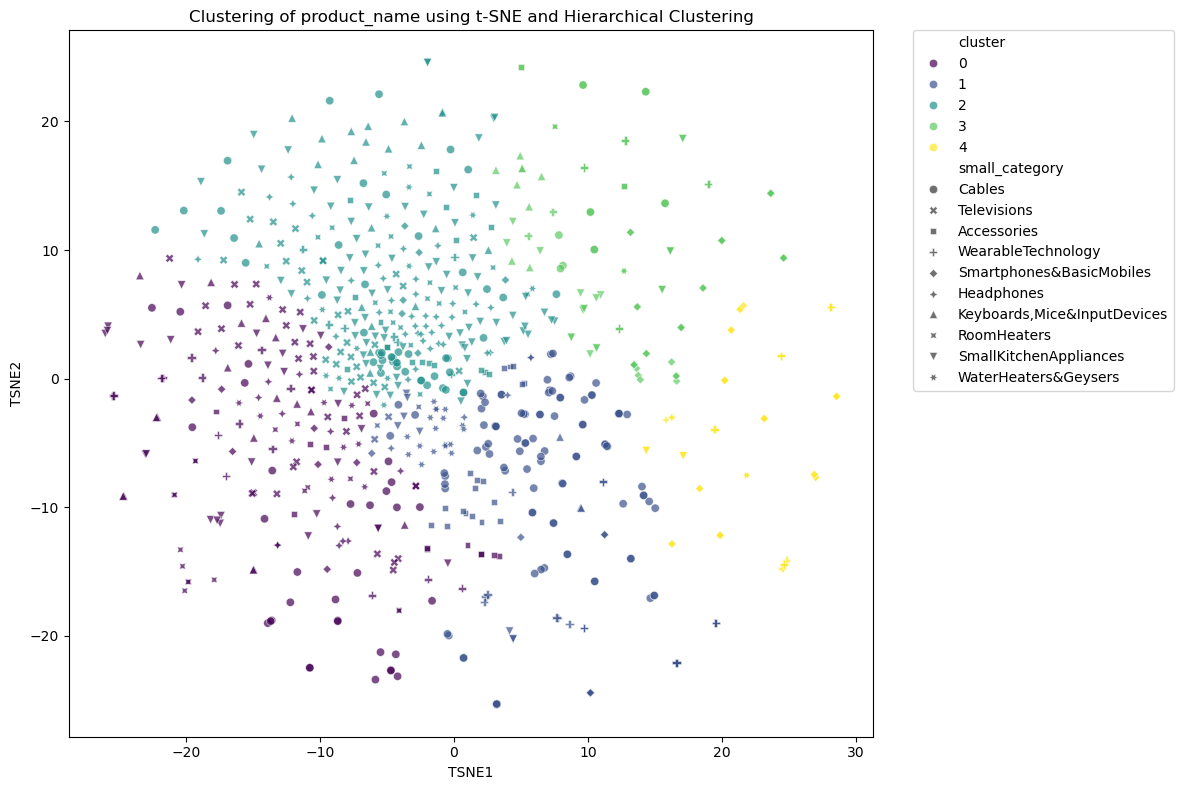

In [53]:
# cluster_KMeans(cluster1_df, 'name_words', n_clusters=4)
# cluster_KMeans(cluster1_df, 'description_words', n_clusters=4)
cluster_result = cluster_TSNE(cluster1_df, 'product_name', n_clusters=5)

### <span style='color:red'>(2024.10.16 added)</span> <span style='color:#fff5b1'>t-SNE와 계층적 군집화를 이용한 제품명 분석</span>
- 군집들 간에 어느 정도 분리가 관찰됨. 이는 각 군집 내 제품명들이 공통된 특성을 공유함을 시사
- 다만, 군집과 카테고리 간에 상당한 겹침이 관찰됨 --> 이는 제품명의 복잡성과 다양한 제품 유형 간 유사한 명명 규칙 때문일 가능성이 높음
- 일부 점들이 주요 군집에서 멀리 떨어져 있음 (특히 좌하단과 우상단). 독특하거나 일반적이지 않은 제품명을 나타낼 수 있음
- 그래프 중앙 부분의 밀도가 높음 --> 많은 제품명들이 공통된 특징이나 단어를 공유하고 있음을 시사
- 클러스터링들이 완벽한 구형이 아님 (t-SNE 시각화의 전형적인 특징). 제품명 간의 복잡한 관계를 낮은 차원에서 완벽히 표현하기 어려움을 나타냄

#### 카테고리 별?
- 케이블: 주로 그래프 중앙과 상단에 집중
- 텔레비전: 여러 군집에 걸쳐 널리 분산
- 스마트폰 & 기본 휴대폰: 대부분 그래프의 우하단 사분면에 위치
- 헤드폰: 다소 분산되어 있으나 좌상단 영역에 집중

#### 인사이트 및 후속 단계
* 카테고리별 명명 패턴:
    - 케이블: 비교적 일관된 명명 패턴 / 텔레비전: 더 다양한 명명 방식
* 군집화 기준 추정:
    - 브랜드명,
    - 기술 사양,
    - 또는 여러 제품 카테고리에서 공통적으로 사용되는 설명 단어들

#### 추가 분석 아이디어?
- 각 군집 내 가장 빈번한 단어 분석
- 각 군집, 특히 이상치에 해당하는 제품명 샘플 조사
- 다양한 군집 수로 실험하여 더 명확한 그룹화 가능성 탐색
- 제품 설명이나 리뷰 등 다른 특성을 기반으로 한 군집화 시도
- 텍스트 특성과 수치형 특성(가격, 평점 등)을 결합한 종합적 군집화 고려

---
- user_id(리뷰 작성 아이디)

In [ ]:
amazon_df.head(2)

product_id                                       product_name  \
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
8  B008IFXQFU  TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...   

                                            category  discounted_price  \
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
8  Computers&Accessories|NetworkingDevices|Networ...             499.0   

   actual_price  discount_percentage  rating  rating_count  \
2        1899.0                 90.0     3.9          7928   
8         999.0                 50.0     4.2        179691   

                                       about_product  \
2  【 Fast Charger& Data Sync】-With built-in safet...   
8  USB WiFi Adapter —— Speedy wireless transmissi...   

                                             user_id  \
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
8  AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...   

                                           user_name  \
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
8  Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...   

                                           review_id  \
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
8  R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...   

                                        review_title  \
2  Good speed for earlier versions,Good Product,W...   
8  Works on linux for me. Get the model with ante...   

                                      review_content  \
2  Not quite durable and sturdy,https://m.media-a...   
8  I use this to connect an old PC to internet. I...   

                                            img_link  \
2  https://m.media-amazon.com/images/W/WEBP_40237...   
8  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  discounted_price_KRW  \
2  https://www.amazon.in/Sounce-iPhone-Charging-C...                  3209   
8  https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...                  8048   

   actual_price_KRW           big_category   small_category  
2             30629  Computers&Accessories           Cables  
8             16112  Computers&Accessories  NetworkAdapters

/Users/isehui/Desktop/ML_project/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


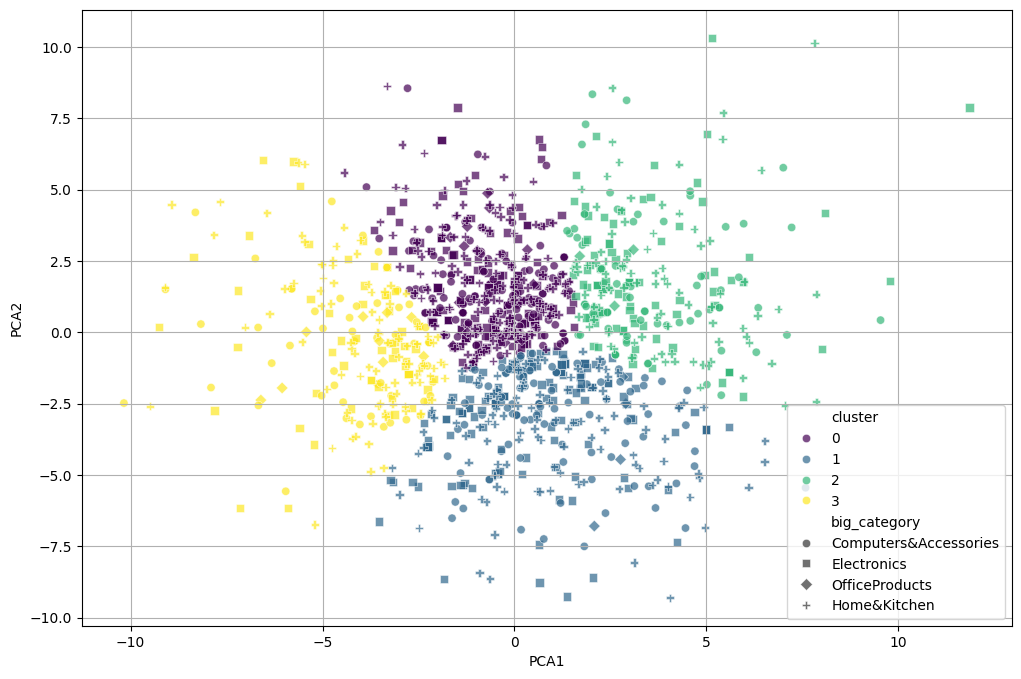

In [ ]:
cluster2_df = amazon_df.copy()

# 데이터가 가장 많은 카테고리 4개 / Electronics, Home&Kitchen, Computers&Accessories, OfficeProducts
filter_category = big_category_count[:4]
cluster2_df = cluster2_df[cluster2_df['big_category'].isin(filter_category['big_category'])]

cluster2_df['user_id']= cluster2_df['user_id'].str.split(',')
cluster2_df = cluster2_df.explode('user_id')

cluster_KMeans(cluster1_df, 'user_id', n_clusters=4)


---

- price 관련 columns

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# numeric_columns = ['discount_percentage', 'rating', 'rating_count', 'discounted_price_KRW', 'actual_price_KRW']
# numeric_columns = ['discount_percentage', 'discounted_price_KRW', 'actual_price_KRW']
# numeric_columns = ['discounted_price_KRW', 'actual_price_KRW']
numeric_columns = ['discount_percentage']

df_numeric = amazon_df[numeric_columns]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# inertia = []
# K = range(1, 10)
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(df_scaled)
#     inertia.append(kmeans.inertia_)

# plt.figure(figsize=(8, 4))
# plt.plot(K, inertia, 'bx-')
# plt.show()

/Users/isehui/Desktop/ML_project/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/7y/sc8hkqqj2b78cbbjbty9xcx40000gn/T/ipykernel_2398/190222680.py:6: UserWarning: 
The markers list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=amazon_df, x='discounted_price_KRW', y='actual_price_KRW', hue='cluster', palette='viridis', alpha=0.7, style='big_category', markers=["o", "s", "D", "P"])


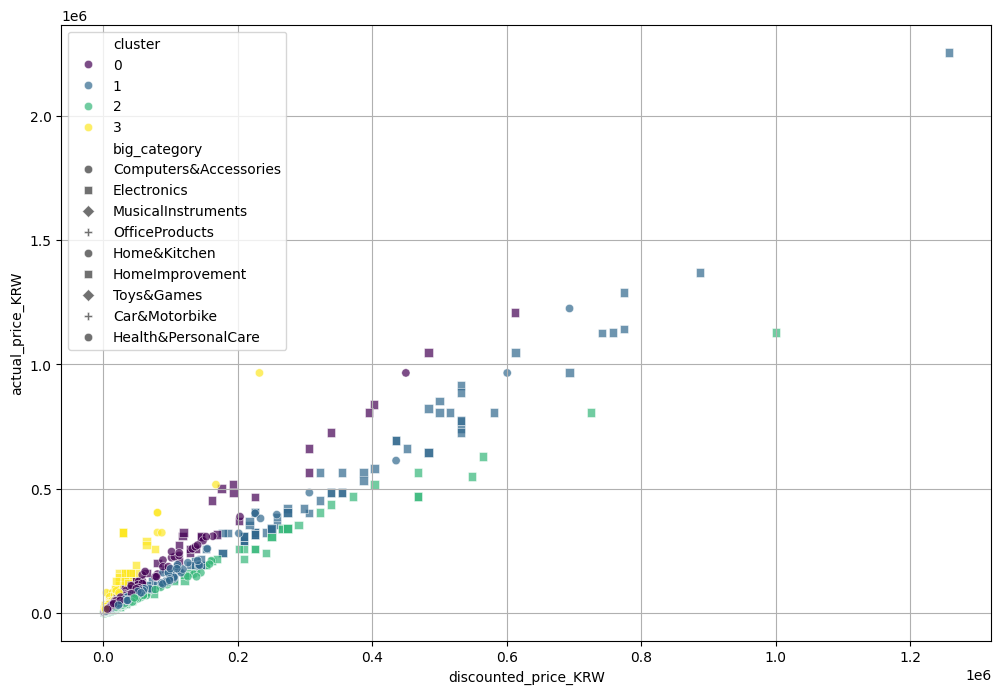

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
amazon_df['cluster'] = kmeans.fit_predict(df_scaled)

# 결과 확인
plt.figure(figsize=(12, 8))
sns.scatterplot(data=amazon_df, x='discounted_price_KRW', y='actual_price_KRW', hue='cluster', palette='viridis', alpha=0.7, style='big_category', markers=["o", "s", "D", "P"])
plt.grid()
plt.show()

---

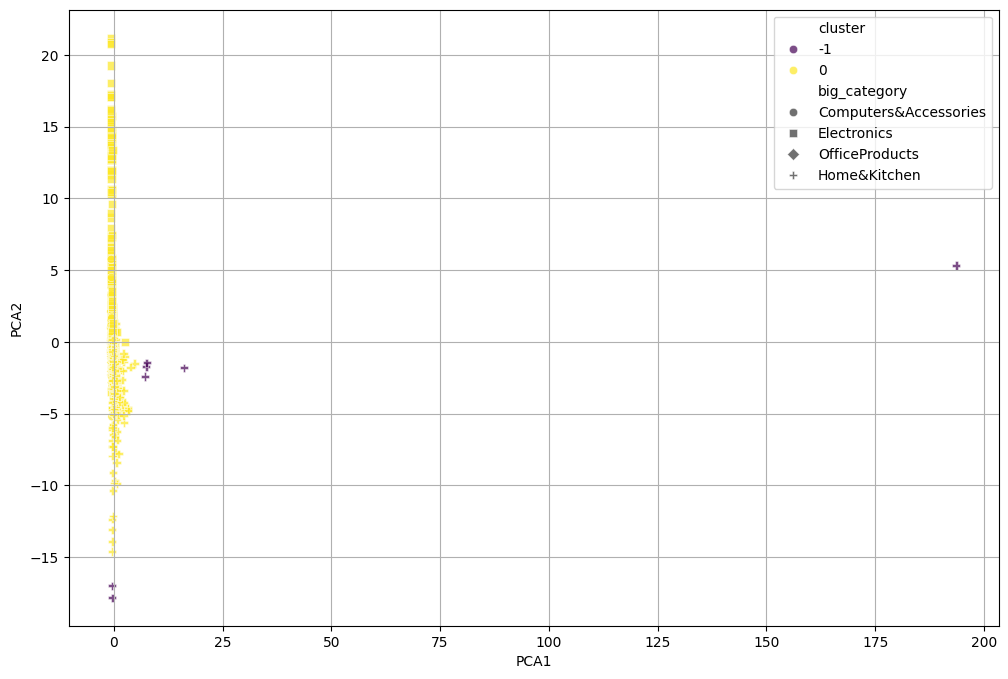

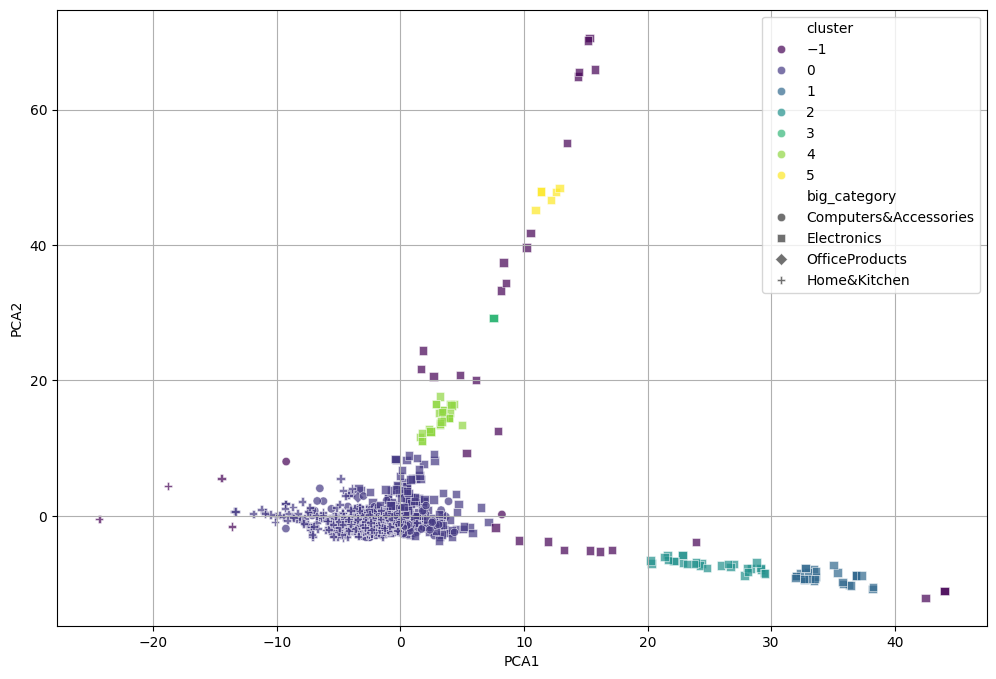

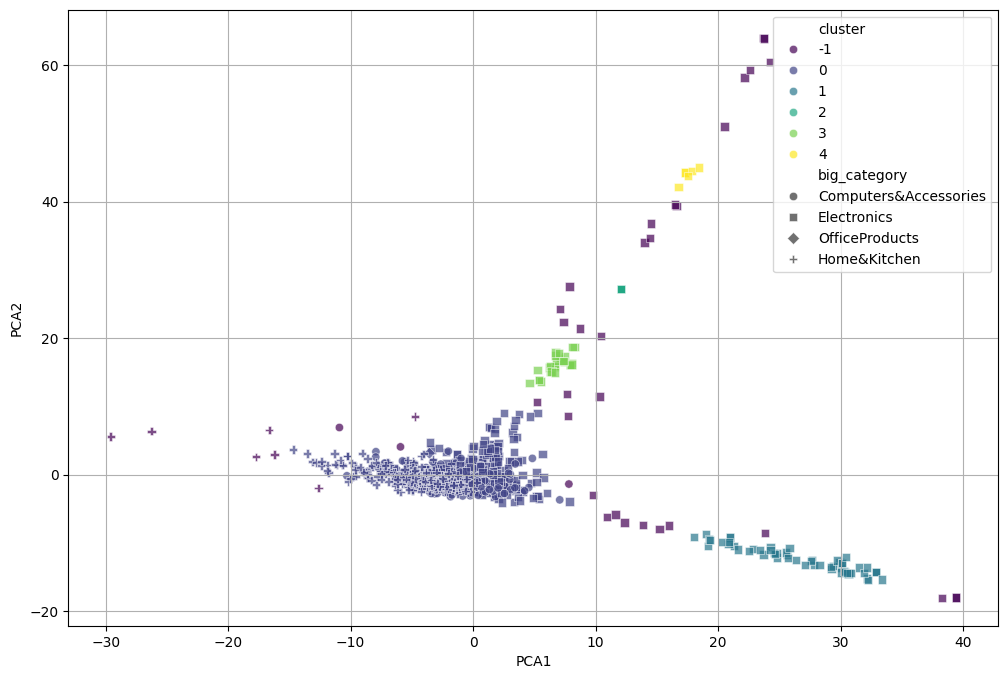

In [ ]:
from sklearn.cluster import DBSCAN

def cluster_and_plot_dbscan(data, column_name, eps=2, min_samples=5):
    # NaN 값을 제외한 후 CountVectorizer로 단어 빈도 벡터화
    vectorizer = CountVectorizer()
    word_count_matrix = vectorizer.fit_transform(data[column_name].dropna())

    # Word Count Matrix를 DataFrame으로 변환
    word_count_df = pd.DataFrame(word_count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # PCA를 통해 차원 축소
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(word_count_df)

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    # PCA 결과를 DataFrame에 추가
    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
    
    # NaN 값 제외한 인덱스에 맞춰 big_category를 추가
    pca_df['big_category'] = data['big_category'].dropna().values

    # DBSCAN 클러스터링
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    pca_df['cluster'] = dbscan.fit_predict(pca_result)

    # 시각화
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=pca_df, x='PCA1', y='PCA2', hue='cluster', 
        palette='viridis', alpha=0.7, style='big_category', 
        markers=["o", "s", "D", "P"]
    )
    plt.grid()
    plt.show()

cluster_and_plot_dbscan(cluster1_df, 'name_words')
cluster_and_plot_dbscan(cluster1_df, 'description_words')
cluster_and_plot_dbscan(cluster1_df, 'combined_text')

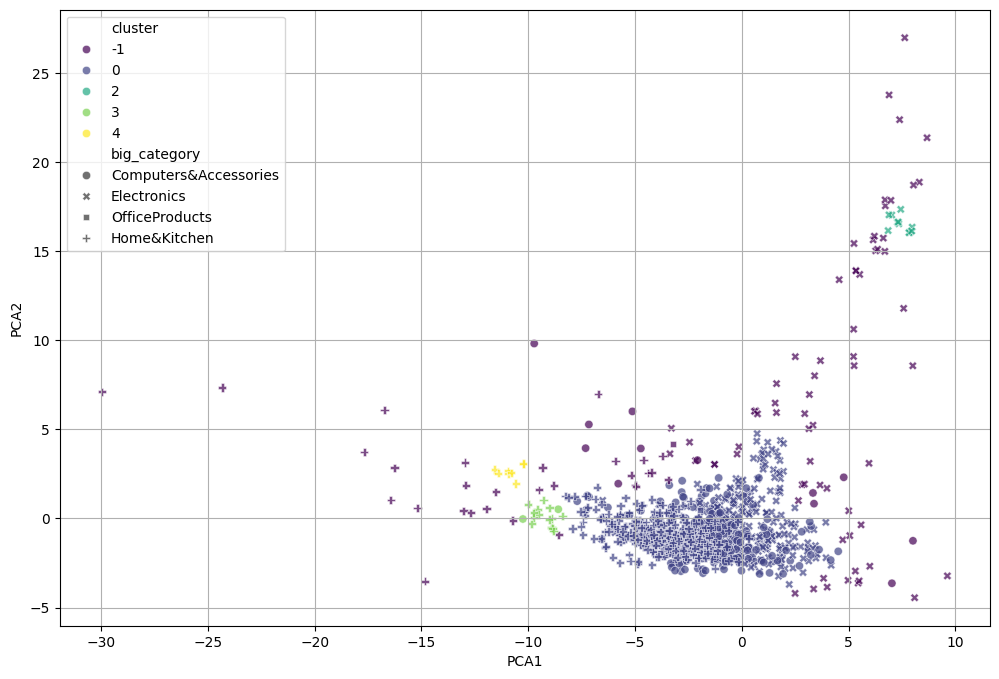

In [ ]:
def cluster_and_plot_filtered(data, column_name, n_clusters=4, pca1_threshold=10, pca2_threshold=30):
    # CountVectorizer로 단어 빈도 벡터화
    vectorizer = CountVectorizer()
    word_count_matrix = vectorizer.fit_transform(data[column_name])

    # Word Count Matrix를 DataFrame으로 변환
    word_count_df = pd.DataFrame(word_count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # PCA를 통해 차원 축소
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(word_count_df)

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    # PCA 결과를 DataFrame으로 변환
    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

    # big_category 열 추가
    pca_df['big_category'] = data['big_category'].values

    # K-Means 군집화 또는 DBSCAN 군집화
    dbscan = DBSCAN(eps=0.8, min_samples=8)
    pca_df['cluster'] = dbscan.fit_predict(pca_result)

    # PCA1 <= 10, PCA2 <= 30 조건 필터링
    filtered_data = pca_df[(pca_df['PCA1'] <= pca1_threshold) & (pca_df['PCA2'] <= pca2_threshold)]

    # 시각화
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=filtered_data, x='PCA1', y='PCA2', hue='cluster', palette='viridis', alpha=0.7, style='big_category')
    plt.grid()
    plt.show()

# 함수 실행 예시
cluster_and_plot_filtered(cluster1_df, 'combined_text', n_clusters=4)


* * *


### <span style='color:red'>(2024.10.16 added)</span> <span style='color:#fff5b1'>앞서 했던 방법들을 한데 모아서 돌려봄</span>

#### 1. 클러스터링 비교

- K-means와 계층적 클러스터링은 유사한 전체 구조를 보여주며, 뚜렷한 클러스터가 보임.
- DBSCAN은 덜 효과적, 하나의 큰 클러스터와 몇 개의 이상치를 식별

#### 2. 대분류(Big Category) 분포 (이미지 4)

- 클러스터 2는 전자제품(Electronics)이 지배적(78%)
- 클러스터 4는 거의 전적으로 전자제품(92%)으로 구성
- 컴퓨터 및 액세서리는 클러스터 0, 1, 3 
- 홈 & 키친 아이템은 클러스터 0과 3

#### 3. 소분류(Small Category) 분포 (이미지 5)
- 클러스터 2는 키보드, 마우스 & 입력 장치(28%)와 태블릿(22%) 등 특정 카테고리에 집중
- 클러스터 4는 삼각대 & 모노포드(61%)가 높음

In [54]:
# 혹시라도 빠진 패키지가 있을까봐 그냥 한군데 모아둠
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import re

/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


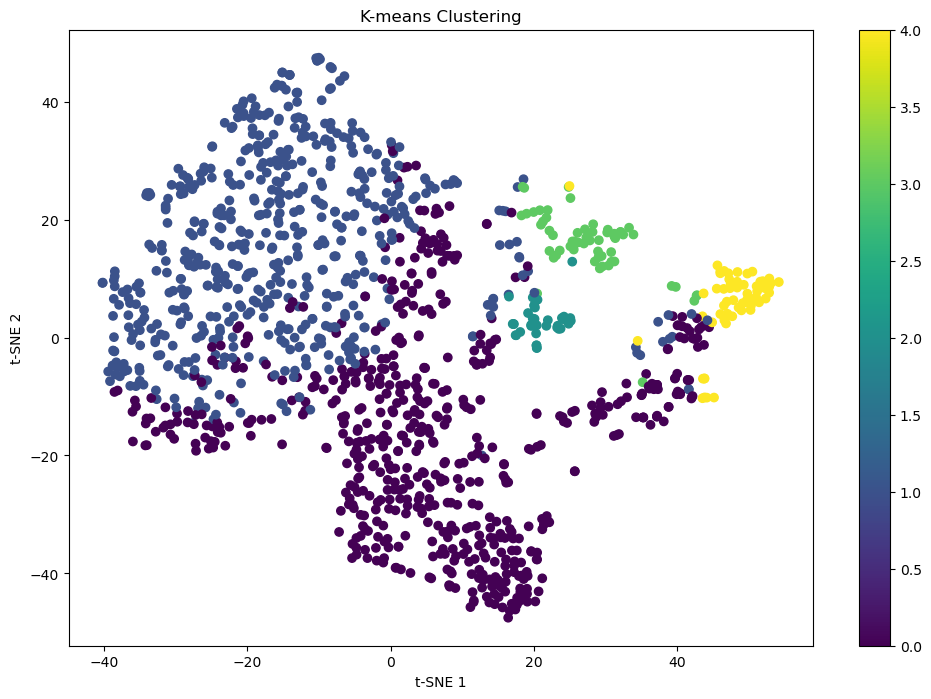

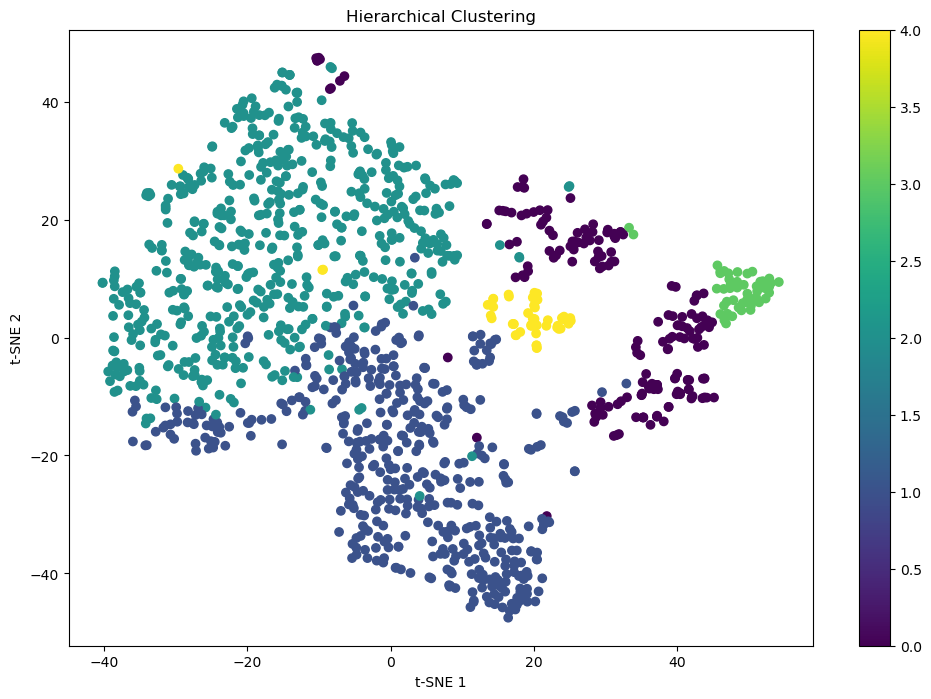

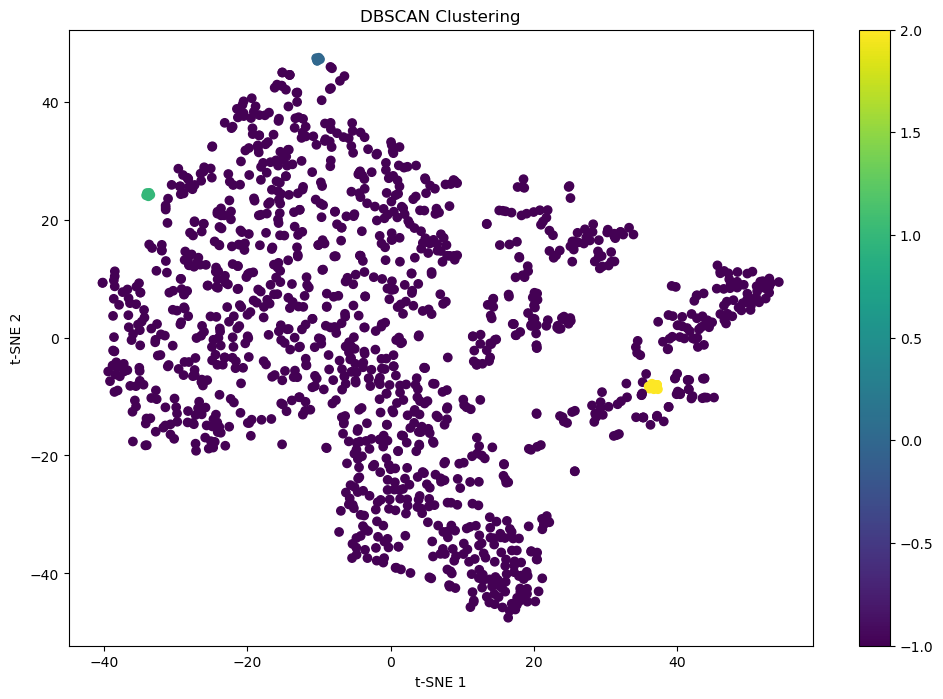

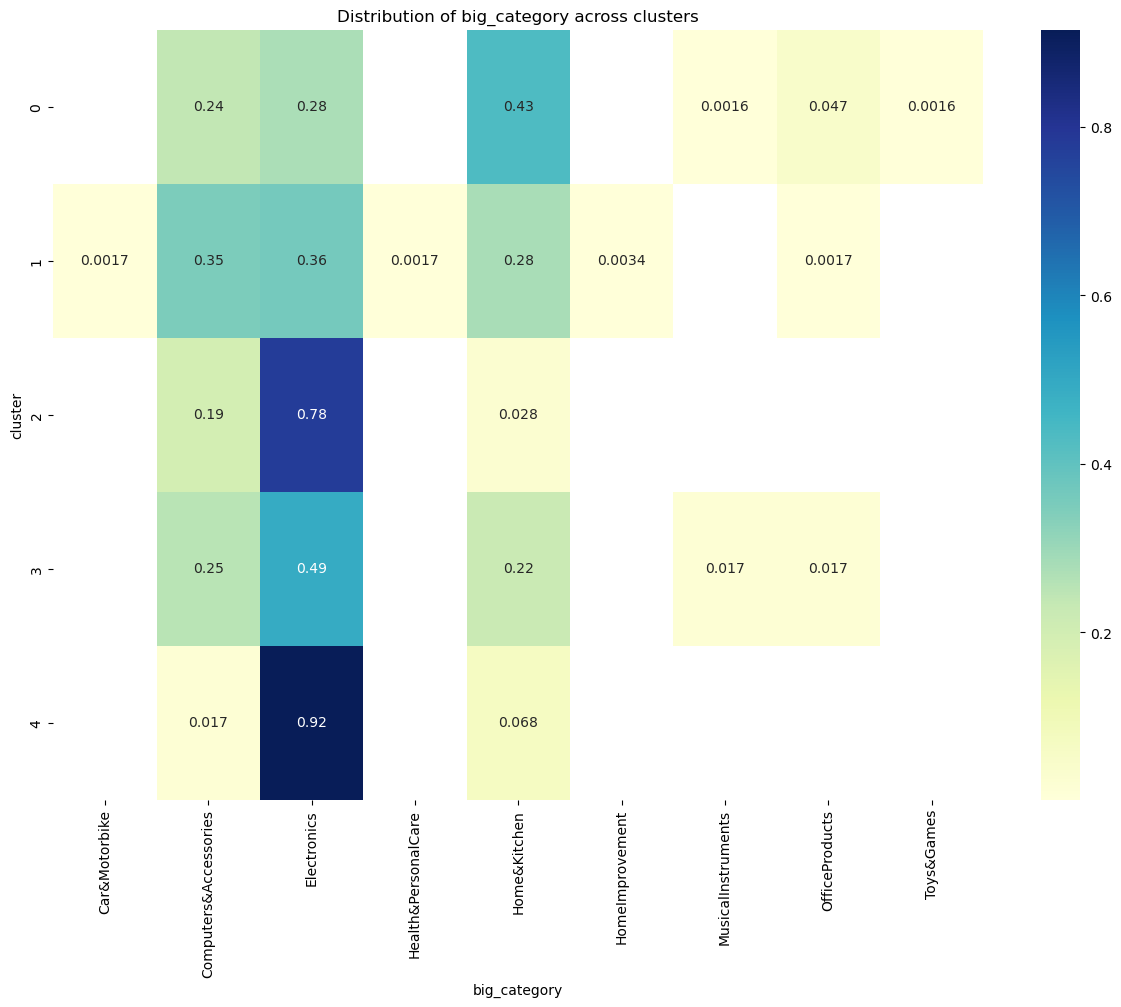

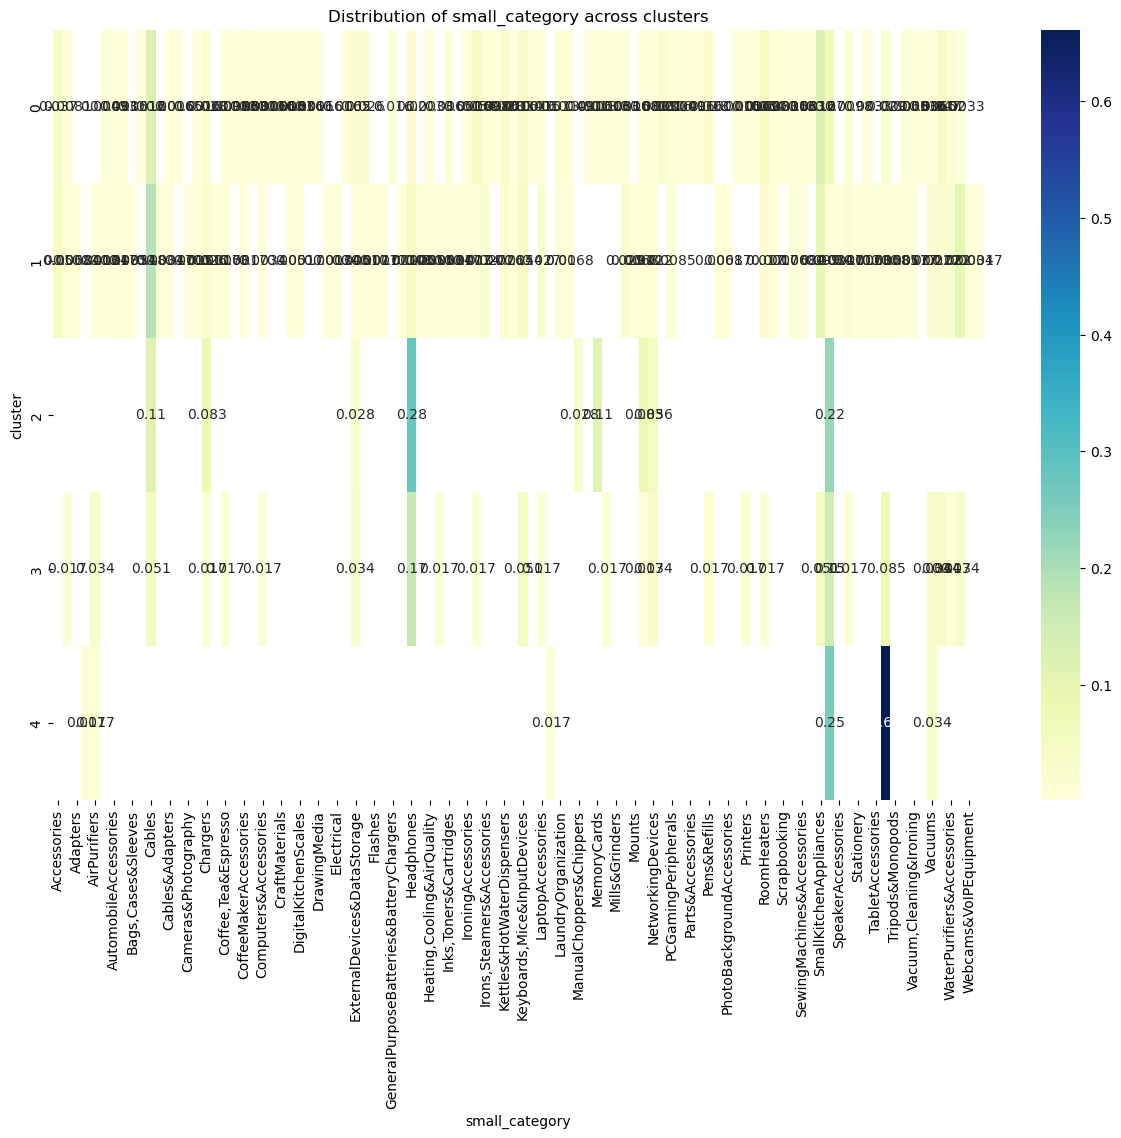

In [55]:
# 1. Data Preprocessing
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    return ' '.join([word for word in text.split() if word not in stop_words])

stop_words = set(stopwords.words('english'))
amazon_df['processed_product_name'] = amazon_df['product_name'].apply(preprocess_text)
amazon_df['processed_about_product'] = amazon_df['about_product'].apply(preprocess_text)
amazon_df['processed_review_content'] = amazon_df['review_content'].apply(preprocess_text)

# 2. Feature Engineering
amazon_df['product_name_length'] = amazon_df['product_name'].str.len()
amazon_df['about_product_length'] = amazon_df['about_product'].str.len()
amazon_df['review_content_length'] = amazon_df['review_content'].str.len()

# 3. Feature Extraction and Scaling
numerical_features = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count',
                      'product_name_length', 'about_product_length', 'review_content_length']

tfidf = TfidfVectorizer(max_features=100)
text_features = tfidf.fit_transform(amazon_df['processed_product_name'] + ' ' + 
                                    amazon_df['processed_about_product'] + ' ' + 
                                    amazon_df['processed_review_content'])

scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(amazon_df[numerical_features])

# Combine numerical and text features
combined_features = np.hstack((scaled_numerical, text_features.toarray()))

# 4. Dimensionality Reduction
pca = PCA(n_components=50)
pca_result = pca.fit_transform(combined_features)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

# 5. Clustering
def perform_clustering(data, method='kmeans', n_clusters=5):
    if method == 'kmeans':
        clustering = KMeans(n_clusters=n_clusters, random_state=42)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=n_clusters)
    elif method == 'dbscan':
        clustering = DBSCAN(eps=0.5, min_samples=5)
    
    labels = clustering.fit_predict(data)
    return labels

# Try different clustering methods
kmeans_labels = perform_clustering(pca_result, method='kmeans')
hierarchical_labels = perform_clustering(pca_result, method='hierarchical')
dbscan_labels = perform_clustering(pca_result, method='dbscan')

# 6. Visualization
def plot_clusters(data, labels, title):
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()

plot_clusters(tsne_result, kmeans_labels, 'K-means Clustering')
plot_clusters(tsne_result, hierarchical_labels, 'Hierarchical Clustering')
plot_clusters(tsne_result, dbscan_labels, 'DBSCAN Clustering')

# Analyze clusters
def analyze_clusters(df, labels, column_name):
    df['cluster'] = labels
    cluster_analysis = df.groupby('cluster')[column_name].value_counts(normalize=True).unstack()
    plt.figure(figsize=(15, 10))
    sns.heatmap(cluster_analysis, annot=True, cmap='YlGnBu')
    plt.title(f'Distribution of {column_name} across clusters')
    plt.show()

analyze_clusters(amazon_df, kmeans_labels, 'big_category')
analyze_clusters(amazon_df, kmeans_labels, 'small_category')

* * *
# 클러스터링 영향 요인 파악
## 1. PCA 분석 관련
> 상위 10%의 클러스터 영향 요인을 다음으로 분석함

|Features above threshold|importance|
|:---|:---:|
|discounted_price| 0.6220|
|actual_price| 0.6080
|review_content_length| 0.3409|
|discount_percentage| 0.2229|
|rating| 0.1792|
|about_product_length| 0.1388|
|product_name_length| 0.1333|
|tv| 0.0533|
|rating_count| 0.0333|
|camera| 0.0258|
|cable| 0.0235|


In [60]:
# Start with the numerical feature names
# Add the feature names from the TfidfVectorizer
feature_names = numerical_features.copy()
feature_names.extend(tfidf.get_feature_names_out())

# PCA Analysis
feature_importance = abs(pca.components_[0])

# Create a list of tuples containing (feature_name, importance)
feature_importance_pairs = list(zip(feature_names, feature_importance))

# Sort the list by importance in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Set a threshold (e.g., top 10% of features)
threshold = np.percentile(feature_importance, 90)

# Or set a fixed threshold value
# threshold = 0.1  # Adjust this value as needed

# Filter and print features above the threshold
print("Features above threshold:")
for feature, importance in feature_importance_pairs:
    if importance >= threshold:
        print(f"{feature}: {importance:.4f}")

# Optionally, you can create a new list with only the important features
important_features = [feature for feature, importance in feature_importance_pairs if importance >= threshold]

print(f"\nNumber of important features: {len(important_features)}")

Features above threshold:
discounted_price: 0.6220
actual_price: 0.6080
review_content_length: 0.3409
discount_percentage: 0.2229
rating: 0.1792
about_product_length: 0.1388
product_name_length: 0.1333
tv: 0.0533
rating_count: 0.0333
camera: 0.0258
cable: 0.0235

Number of important features: 11


* * *
## 2. K-means 클러스터 별 특징

### 클러스터 0
- 대체로 평균적인 특성을 보이나, 제품명과 제품 설명의 길이가 상대적으로 짧음
- 가격은 평균보다 약간 낮은 편

### 클러스터 1
- 높은 할인율이 특징적 (discount_percentage 0.6179)
- 제품명과 리뷰 내용의 길이가 가장 김
- 평균 평점이 가장 낮음

### 클러스터 2
- 압도적으로 높은 평가 수 (rating_count 4.93)
- 평균 평점도 높은 편
- 가격은 평균보다 약간 낮음

### 클러스터 3
- 케이블 관련 제품이 많은 것으로 보임 (cable 3.5451)
- 가격은 평균보다 약간 높음
- 할인율은 낮은 편

### 클러스터 4
- 가장 높은 가격대의 제품들 (discounted_price 3.8573, actual_price 3.7414)
- 가장 높은 평균 평점 (rating 0.4540)
- 리뷰 내용의 길이가 긺

## <span style='color:orange'>**종합 분석**</span>
1. **가격과 할인율**: 특히 클러스터 4가 <span style='color:orange'><u>고가 제품군</u></span>, 클러스터 1이 <span style='color:orange'><u>높은 할인율</u></span>의 제품군으로 보임.

2. **리뷰와 평가**: 클러스터 2는 <span style='color:orange'><u>많은 리뷰와 높은 평점</u></span>을 받은 인기 제품군

3. **제품 설명**: 클러스터 1의 제품들은 긴 제품명과 상세한 설명 보유 --> 복잡하거나 기능이 많은 제품일 가능성

4. **특정 카테고리**: 클러스터 3은 **케이블** 관련 제품이 많아 해당 특정 카테고리에 집중

5. **가격대별 특성**: 
   - 저가 제품군 (클러스터 0, 1, 2): 다양한 특성을 보이며, 할인율, 리뷰 수, 제품 설명 길이 등에서 차이가 있음.
   - 고가 제품군 (클러스터 3, 4): 높은 평점과 긴 리뷰 내용이 특징적

In [67]:
def analyze_cluster_centroids(centroids_original, feature_names, important_features, feature_importance=None):
    """
    Analyze cluster centroids and return a DataFrame with important features.
    
    Parameters:
    - centroids_original: numpy array of centroids in original feature space
    - feature_names: list of all feature names
    - important_features: list of important feature names
    - feature_importance: optional dict of feature importances
    
    Returns:
    - DataFrame of cluster centroids with important features
    """
    
    def create_cluster_dict(centroid, cluster_num):
        """Create a dictionary for a single cluster."""
        cluster_dict = {'Cluster': cluster_num}
        for j, value in enumerate(centroid):
            if feature_names[j] in important_features:
                cluster_dict[feature_names[j]] = round(value, 4)
        return cluster_dict

    def create_centroids_dataframe(cluster_data):
        """Create a DataFrame from cluster data and set index."""
        df = pd.DataFrame(cluster_data)
        return df.set_index('Cluster')

    def sort_columns_by_importance(df, importance_dict):
        """Sort DataFrame columns by feature importance."""
        sorted_columns = sorted(df.columns, 
                                key=lambda x: importance_dict.get(x, 0), 
                                reverse=True)
        return df[sorted_columns]

    # Create list of cluster dictionaries
    cluster_data = [create_cluster_dict(centroid, i) 
                    for i, centroid in enumerate(centroids_original)]

    # Create DataFrame
    centroids_df = create_centroids_dataframe(cluster_data)

    # Sort columns by importance if feature_importance is provided
    if feature_importance is not None:
        centroids_df = sort_columns_by_importance(centroids_df, feature_importance)

    return centroids_df

# Example usage:
# centroids_df = analyze_cluster_centroids(centroids_original, feature_names, important_features, feature_importance_dict)
# print(centroids_df)

In [68]:
# Optional: Function to display top N features
def display_top_features(df, n=10):
    """Display top N features of the centroids DataFrame."""
    return df.iloc[:, :n]

# Optional: Function to transpose DataFrame
def transpose_centroids_df(df):
    """Transpose the centroids DataFrame."""
    return df.T

# Example usage of additional functions:
# top_features_df = display_top_features(centroids_df, n=15)
# transposed_df = transpose_centroids_df(centroids_df)

In [72]:
# Perform K-means clustering on the PCA result
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

# Transform centroids back to original feature space
centroids_pca = kmeans.cluster_centers_
centroids_original = pca.inverse_transform(centroids_pca)

centroids_df = analyze_cluster_centroids(centroids_original, feature_names, important_features)
centroids_df.head()

/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


discounted_price  actual_price  discount_percentage  rating  \
Cluster                                                                
0                 -0.1317       -0.1752              -0.4743  0.0624   
1                 -0.2770       -0.2073               0.6179 -0.1450   
2                 -0.2473       -0.2791              -0.0002  0.2645   
3                  0.4109        0.3080              -0.5412  0.1734   
4                  3.8573        3.7414              -0.6497  0.4540   

         rating_count  product_name_length  about_product_length  \
Cluster                                                            
0             -0.1366              -0.6710               -0.5873   
1             -0.2016               0.7914                0.5506   
2              4.9300              -0.3280               -0.2599   
3              0.5637              -0.1004                0.0457   
4             -0.1514              -0.5634                0.7653   

         review_content_length   cable  camera      tv  
Cluster                                                 
0                      -0.2595  0.0754  0.0401  0.0371  
1                      -0.1940  0.1175  0.0210  0.0358  
2                       0.0922  0.1035  0.0466  0.0336  
3                       3.5451  0.0819  0.0808  0.0772  
4                       1.0230  0.0112  0.1229  0.4579

## 3. 실루엣 분석

> 평균 실루엣 점수 (빨간 점선): 약 0.21   
> 점수 범위: -0.1에서 0.6 사이

## 주요 관찰 사항

* 대부분의 샘플이 양(+)의 실루엣 점수를 가지고 있어, 전반적으로 클러스터링이 어느 정도 의미 있게 이루어졌음

* **점수 분포**: 
   - 대부분의 점수가 0.1에서 0.4 사이에 분포
   - 일부 샘플은 0.5 이상의 높은 점수를 보이며, 해당 샘플들은 걸맞은 클러스터에 매우 잘 할당됨

* 소수의 샘플이 음의 실루엣 점수를 가지고 있어, 잘못된 클러스터에 할당되었을 가능성 있음

* 실루엣 점수가 샘플마다 크게 변동하고 있어, 클러스터의 품질이 일관되지 않음

## 향후 방향성

1. **클러스터링 품질**: 평균 실루엣 점수가 0.21로, 클러스터링 결과가 보통 수준임. 완벽한 분리는 아니지만, 의미 있는 구조를 포착.

2. **개선점**: 
   - 일부 샘플의 낮은 실루엣 점수는 클러스터 수 조정이나 다른 클러스터링 알고리즘 시도를 통해 개선될 수 있음. 특히, 음의 점수를 가진 샘플들에 대한 재검토가 필요.
   - 높은 변동성은 데이터가 뚜렷이 구분되는 클러스터를 형성하지 않을 수 있음. 이는 데이터의 본질적 특성이거나 추가적인 전처리 필요성을 나타냄.
   - 다양한 클러스터 수로 실험하여 최적의 클러스터 수 탐색
   - 다른 클러스터링 알고리즘(예: DBSCAN, 계층적 클러스터링) 시도
   - 특성 선택 또는 차원 축소 기법을 적용하여 클러스터 품질 개선 시도

In [75]:
from sklearn.metrics import silhouette_score, silhouette_samples

def perform_silhouette_analysis(data, labels, title="Silhouette Analysis"):
    """
    Perform silhouette analysis on clustering results.
    
    Parameters:
    data (array-like): The dataset used for clustering (e.g., pca_result or tsne_result)
    labels (array-like): Cluster labels for each data point
    title (str): Title for the plot
    
    Returns:
    float: Average silhouette score
    """
    # Calculate silhouette scores
    silhouette_avg = silhouette_score(data, labels)
    sample_silhouette_values = silhouette_samples(data, labels)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(sample_silhouette_values)
    plt.axhline(silhouette_avg, color="red", linestyle="--")
    plt.title(title)
    plt.xlabel("Sample")
    plt.ylabel("Silhouette Score")
    
    # Add average score to the plot
    plt.text(0.05, 0.95, f'Average Score: {silhouette_avg:.4f}', 
             transform=plt.gca().transAxes, verticalalignment='top')
    
    plt.show()
    
    print(f"Average Silhouette Score: {silhouette_avg:.4f}")
    
    return silhouette_avg

# Example usage:
# score_kmeans = perform_silhouette_analysis(pca_result, kmeans_labels, "K-means Silhouette Analysis")
# score_dbscan = perform_silhouette_analysis(tsne_result, dbscan_labels, "DBSCAN Silhouette Analysis")
# score_hierarchical = perform_silhouette_analysis(pca_result, hierarchical_labels, "Hierarchical Clustering Silhouette Analysis")

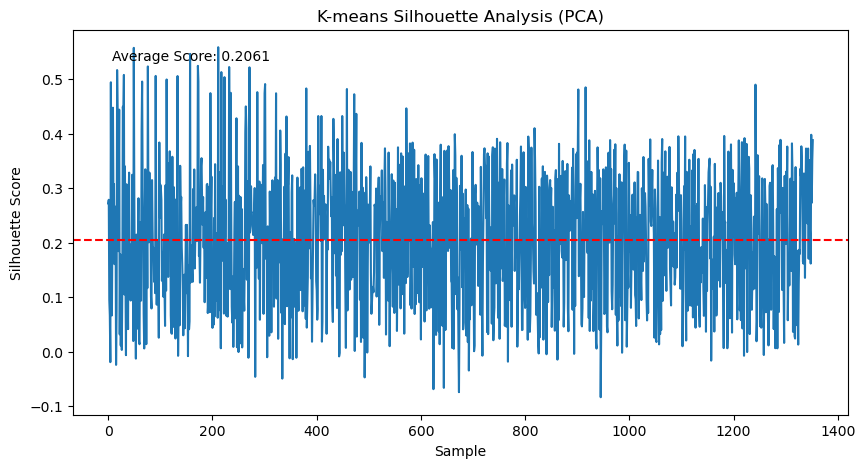

Average Silhouette Score: 0.2061


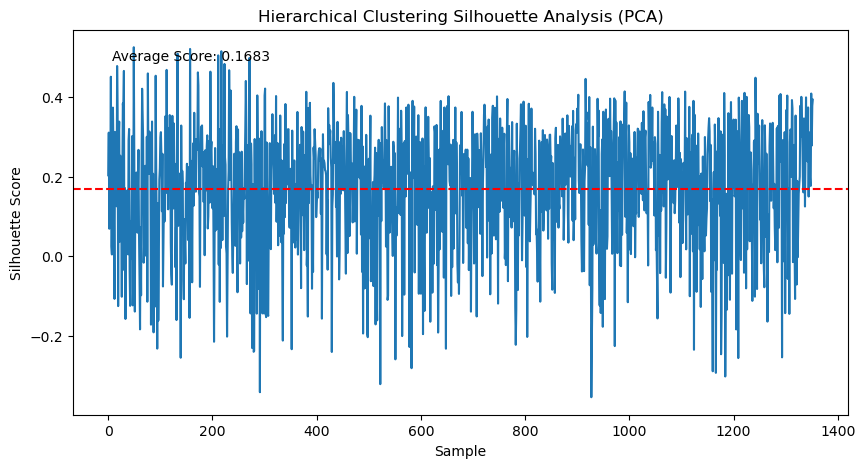

Average Silhouette Score: 0.1683


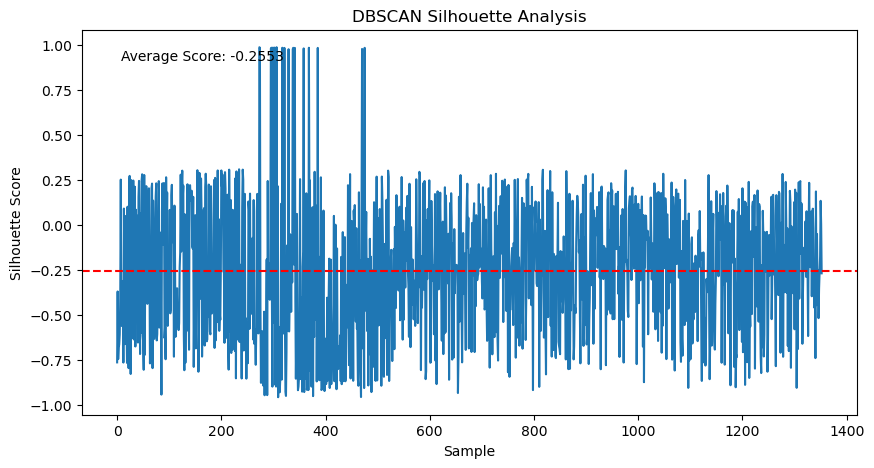

Average Silhouette Score: -0.2553


In [81]:
# For K-means with PCA result
score_kmeans = perform_silhouette_analysis(pca_result, kmeans_labels, "K-means Silhouette Analysis (PCA)")

# For Hierarchical clustering with PCA result
score_hierarchical = perform_silhouette_analysis(pca_result, hierarchical_labels, "Hierarchical Clustering Silhouette Analysis (PCA)")

# For DBSCAN with PCA result
score_dbscan = perform_silhouette_analysis(tsne_result, dbscan_labels, "DBSCAN Silhouette Analysis")


## 4. 클러스터 프로파일 및 시각화

#### (1) 데이터 프레임으로 변환
- 앞서 분석한 결과값들을 표로 정리
- 각 클러스터 별 상위 분류값을 한눈에 볼 수 있음.
- numeric features들의 평균값과 표준편차도 함께 확인.

In [82]:
def profile_clusters(df, labels, numerical_features, category_column, n_clusters=5):
    """
    Profile clusters based on numerical features and categories.
    
    Parameters:
    df (pd.DataFrame): Original dataframe
    labels (array-like): Cluster labels for each data point
    numerical_features (list): List of numerical feature column names
    category_column (str): Name of the category column
    n_clusters (int): Number of clusters
    
    Returns:
    dict: A dictionary containing profile information for each cluster
    """
    # Create a copy of the dataframe with cluster labels
    df_copy = df.copy()
    df_copy['cluster'] = labels
    
    cluster_profiles = {}
    
    for cluster in range(n_clusters):
        cluster_data = df_copy[df_copy['cluster'] == cluster]
        
        profile = {
            'numerical_summary': cluster_data[numerical_features].describe(),
            'top_categories': cluster_data[category_column].value_counts(normalize=True).head()
        }
        
        cluster_profiles[f"Cluster {cluster}"] = profile
    
    return cluster_profiles

In [84]:
def display_cluster_profiles(cluster_profiles):
    """
    Display the cluster profiles in a readable format.
    
    Parameters:
    cluster_profiles (dict): Output from profile_clusters function
    """
    for cluster, profile in cluster_profiles.items():
        print(f"{cluster}:")
        print("Numerical Features Summary:")
        print(profile['numerical_summary'])
        print("\nTop Categories:")
        print(profile['top_categories'])
        print("\n" + "="*50 + "\n")

In [86]:
def cluster_profiles_to_dataframe(cluster_profiles):
    """
    Convert cluster profiles to a pandas DataFrame.
    
    Parameters:
    cluster_profiles (dict): Output from profile_clusters function
    
    Returns:
    pd.DataFrame: A DataFrame containing cluster profile information
    """
    # Prepare data for DataFrame
    data = []
    for cluster, profile in cluster_profiles.items():
        # Numerical features summary
        num_summary = profile['numerical_summary'].loc[['mean', 'std']]
        num_summary_dict = {f"{feat}_{stat}": value 
                            for feat in num_summary.columns 
                            for stat, value in num_summary[feat].items()}
        
        # Top categories
        top_cats = profile['top_categories']
        top_cats_dict = {f"top_category_{i+1}": f"{cat} ({pct:.2%})" 
                         for i, (cat, pct) in enumerate(top_cats.items())}
        
        # Combine all information
        cluster_data = {'cluster': cluster, **num_summary_dict, **top_cats_dict}
        data.append(cluster_data)
    
    # Create DataFrame
    df = pd.DataFrame(data)
    df.set_index('cluster', inplace=True)
    
    return df

In [94]:
# 각 클러스터 별 상위 카테고리
profiles = profile_clusters(amazon_df, kmeans_labels, numerical_features, 'small_category')
profiles_df = cluster_profiles_to_dataframe(profiles)
display(profiles_df.iloc[:,-5:])

top_category_1                     top_category_2  \
cluster                                                              
Cluster 0       Cables (12.38%)    SmallKitchenAppliances (12.38%)   
Cluster 1       Cables (18.46%)        WearableTechnology (10.26%)   
Cluster 2   Headphones (27.78%)  Smartphones&BasicMobiles (22.22%)   
Cluster 3   Headphones (16.95%)  Smartphones&BasicMobiles (15.25%)   
Cluster 4  Televisions (66.10%)  Smartphones&BasicMobiles (25.42%)   

                             top_category_3  \
cluster                                       
Cluster 0  Smartphones&BasicMobiles (7.00%)   
Cluster 1    SmallKitchenAppliances (9.91%)   
Cluster 2                   Cables (11.11%)   
Cluster 3               Televisions (8.47%)   
Cluster 4                   Vacuums (3.39%)   

                                top_category_4                  top_category_5  
cluster                                                                         
Cluster 0                        Irons (5.37%)             RoomHeaters (5.37%)  
Cluster 1                  Accessories (4.96%)              Headphones (4.79%)  
Cluster 2                 MemoryCards (11.11%)         NetworkAdapters (8.33%)  
Cluster 3  Keyboards,Mice&InputDevices (5.08%)  SmallKitchenAppliances (5.08%)  
Cluster 4                      Laptops (1.69%)            AirPurifiers (1.69%)

In [100]:
# numerical features 평균값
display(profiles_df.iloc[:,:-5:2])

discounted_price_mean  actual_price_mean  discount_percentage_mean  \
cluster                                                                         
Cluster 0            2358.573143        3731.739349                 36.459283   
Cluster 1            1318.113265        3371.879761                 60.080342   
Cluster 2            1545.166667        2549.833333                 46.722222   
Cluster 3            6248.813559        9141.762712                 35.016949   
Cluster 4           30946.254237       47623.271186                 32.661017   

           rating_mean  rating_count_mean  product_name_length_mean  \
cluster                                                               
Cluster 0     4.109446       11957.972313                 92.421824   
Cluster 1     4.048034        9216.441026                167.994872   
Cluster 2     4.169444      225771.250000                110.138889   
Cluster 3     4.142373       41504.152542                121.915254   
Cluster 4     4.225424       11332.271186                 97.983051   

           about_product_length_mean  review_content_length_mean  
cluster                                                           
Cluster 0                 462.068404                  929.908795  
Cluster 1                 965.430769                 1049.294017  
Cluster 2                 606.861111                 1570.500000  
Cluster 3                 742.152542                 7857.813559  
Cluster 4                1060.406780                 3265.203390

In [102]:
# numerical features의 표준 편차
display(profiles_df.iloc[:,1:-5:2])

discounted_price_std  actual_price_std  discount_percentage_std  \
cluster                                                                      
Cluster 0           3570.554886       5528.472913                19.977331   
Cluster 1           2064.203110       4637.999472                16.254885   
Cluster 2           2109.717063       2590.019829                19.631769   
Cluster 3           6463.548938       9157.463202                18.605238   
Cluster 4          11770.717187      19998.746717                14.065867   

           rating_std  rating_count_std  product_name_length_std  \
cluster                                                            
Cluster 0    0.288850      16834.984947                37.073837   
Cluster 1    0.322767      15999.532176                34.945726   
Cluster 2    0.143067      96377.903562                44.046179   
Cluster 3    0.186809      40712.703695                48.734074   
Cluster 4    0.145736      11957.370054                35.433518   

           about_product_length_std  review_content_length_std  
cluster                                                         
Cluster 0                271.255023                 741.896735  
Cluster 1                449.412123                 816.454593  
Cluster 2                315.834871                1603.807354  
Cluster 3                363.316942                2926.704646  
Cluster 4                351.393635                2262.845522

#### (2) 박스 플롯
- 각 feature 별로 한 눈에 들여다 볼 수 있어서 편함. 
- 고가 제품군으로 추측되는 4-5 클러스터와, 1-3 클러스터 간의 차이가 두드러짐.

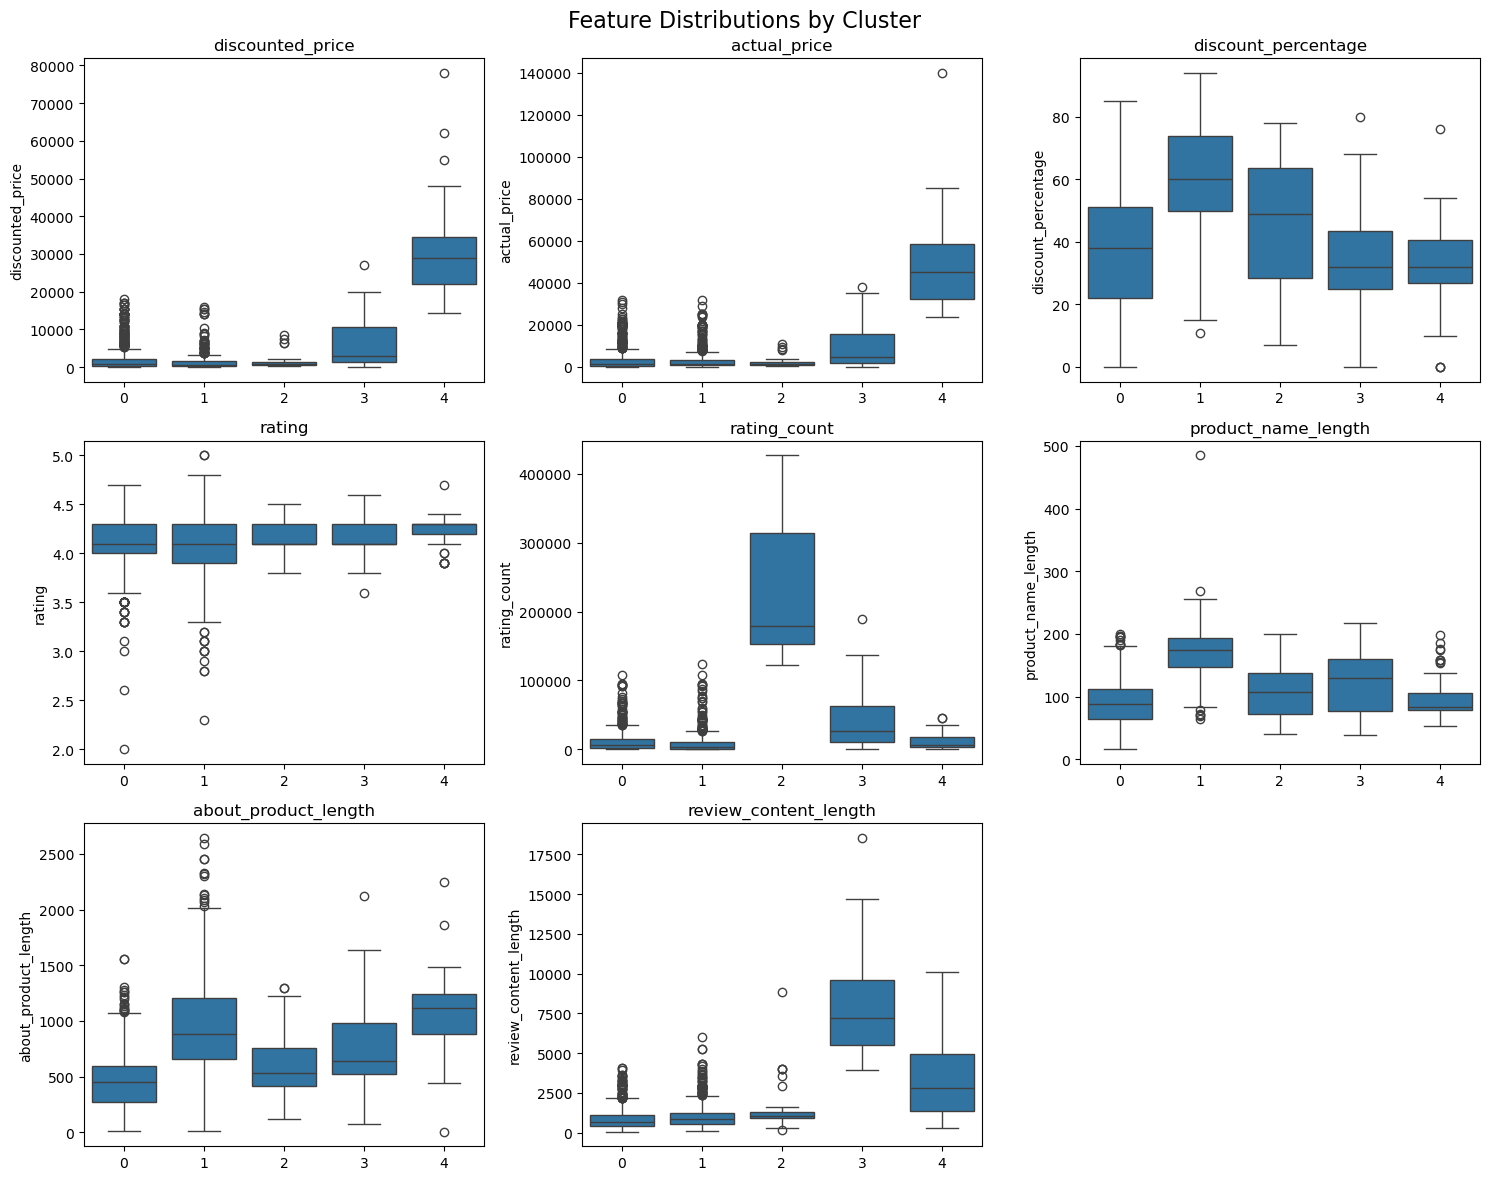

In [104]:
import math

def plot_feature_distributions(df, numerical_features, cluster_column='cluster'):
    # Calculate the grid size
    n_features = len(numerical_features)
    n_cols = 3  # You can adjust this to change the number of columns
    n_rows = math.ceil(n_features / n_cols)

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    fig.suptitle('Feature Distributions by Cluster', fontsize=16)

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Create a boxplot for each feature
    for i, feature in enumerate(numerical_features):
        sns.boxplot(x=cluster_column, y=feature, data=df, ax=axes[i])
        axes[i].set_title(feature)
        axes[i].set_xlabel('')  # Remove x-label as it's redundant

    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
plot_feature_distributions(amazon_df, numerical_features)

#### (3) 워드 클라우드
- 처음 돌렸을 때, 다른 클러스터와 중복되고 'stop words'로 여겨질만 한 단어들을 발견함.
- 단위와 색상을 가르키는 단어는 제외함
    - {'inch', 'cm', 'mm', 'pack', 'set', 'piece', 'black', 'white', 'blue'}

- 그 다음, TF-IDF를 사용해서 각 클러스터에서 독보적인/유니크한 단어는 조금 더 크게 보고자 함.

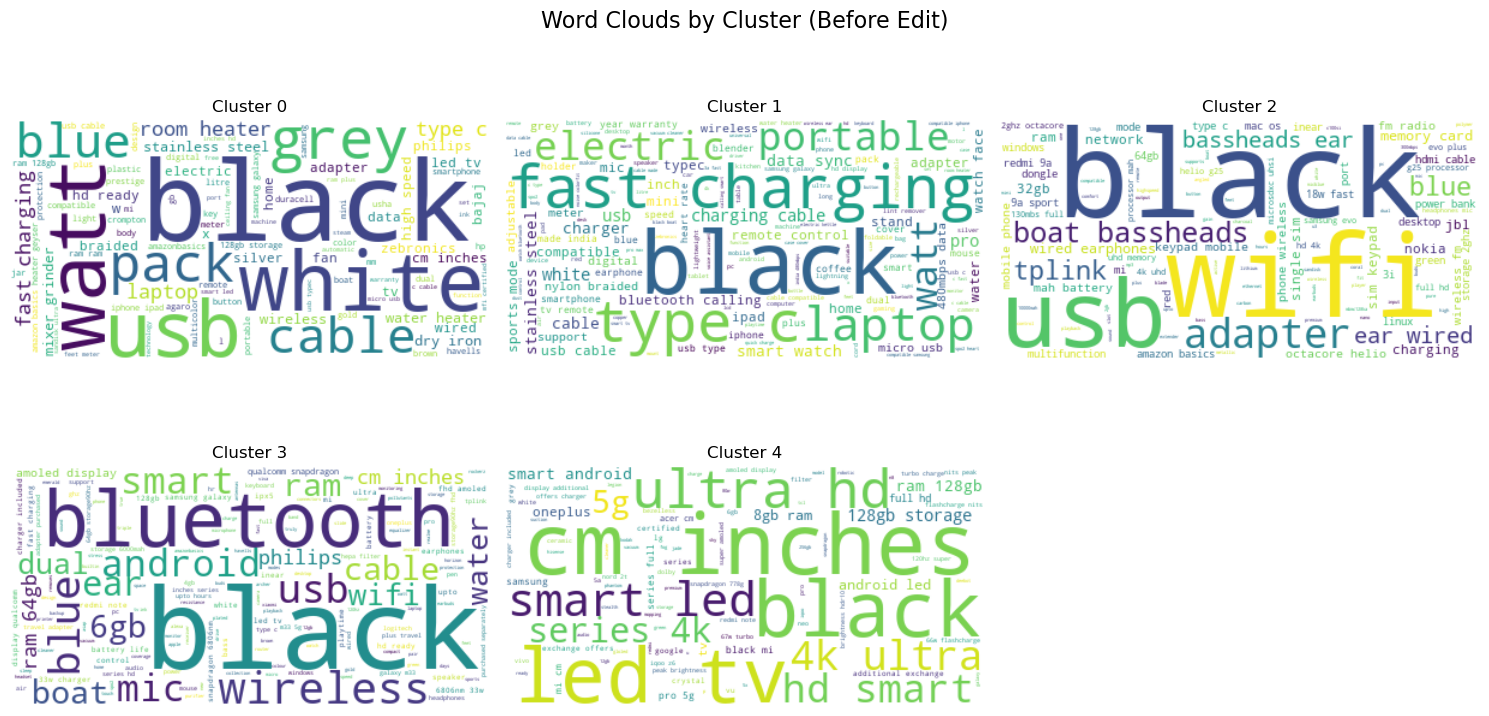

In [108]:
from wordcloud import WordCloud

def plot_cluster_wordclouds(df, text_column, cluster_column='cluster', n_clusters=5):
    # Calculate the grid size
    n_cols = min(3, n_clusters)  # Max 3 columns
    n_rows = math.ceil(n_clusters / n_cols)

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    fig.suptitle('Word Clouds by Cluster (Before Edit)', fontsize=16)

    # Flatten the axes array for easier indexing
    axes = axes.flatten() if n_clusters > 1 else [axes]

    for cluster in range(n_clusters):
        text = " ".join(df[df[cluster_column] == cluster][text_column])
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
        
        axes[cluster].imshow(wordcloud, interpolation='bilinear')
        axes[cluster].axis("off")
        axes[cluster].set_title(f"Cluster {cluster}")

    # Remove any unused subplots
    for j in range(n_clusters, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
plot_cluster_wordclouds(amazon_df, 'processed_product_name', n_clusters=5)

In [106]:
def preprocess_text(text):
    # Add more stopwords specific to your dataset
    additional_stopwords = {'inch', 'cm', 'mm', 'pack', 'set', 'piece', 'black', 'white', 'blue'}
    stopwords = set(stop_words).union(additional_stopwords)
    
    # Convert to lowercase and split
    words = text.lower().split()
    
    # Remove stopwords and non-alphabetic tokens
    words = [word for word in words if word.isalpha() and word not in stopwords]
    
    return ' '.join(words)

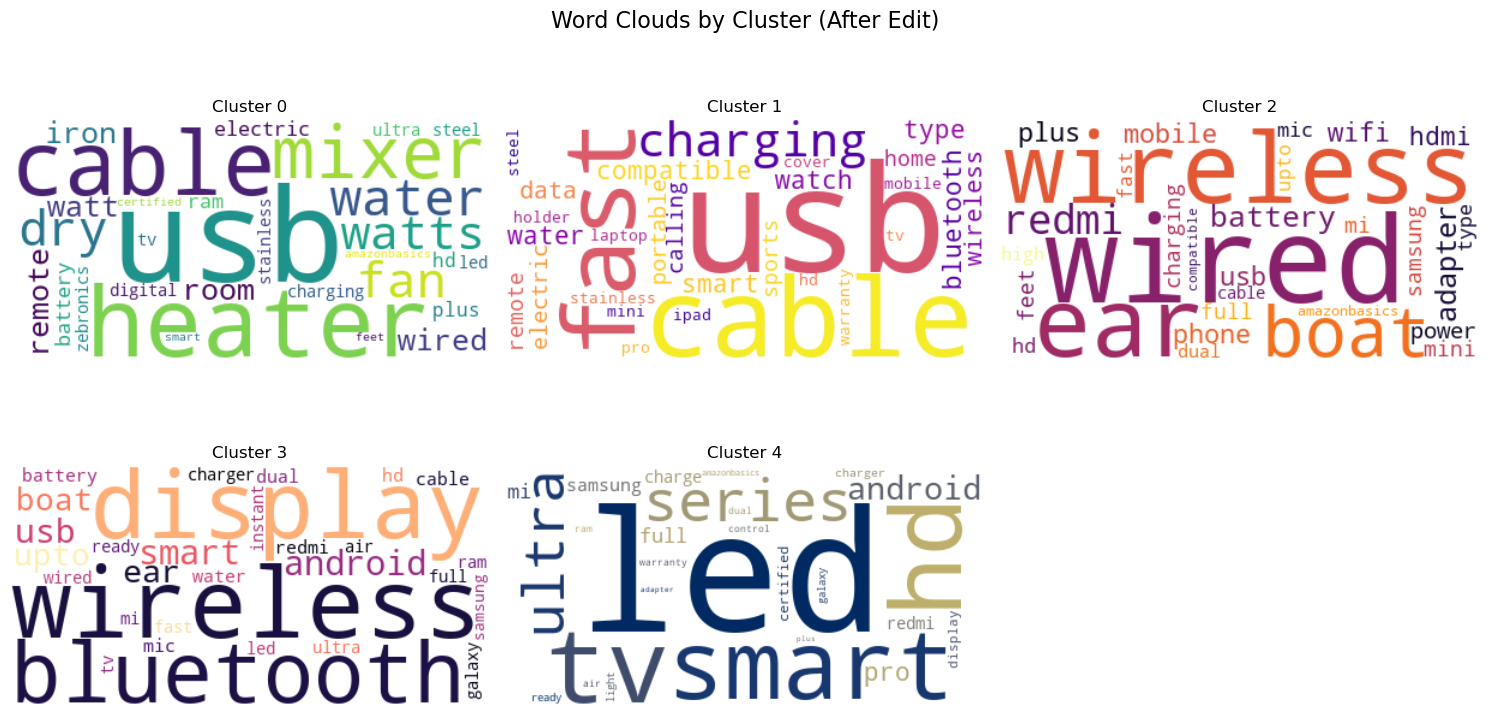

In [109]:
def plot_cluster_wordclouds(df, text_column, cluster_column='cluster', n_clusters=5):
    # Preprocess the text
    df['processed_text'] = df[text_column].apply(preprocess_text)
    
    # Calculate TF-IDF
    tfidf = TfidfVectorizer(max_features=100)
    tfidf_matrix = tfidf.fit_transform(df['processed_text'])
    feature_names = tfidf.get_feature_names_out()
    
    # Calculate the grid size
    n_cols = min(3, n_clusters)
    n_rows = math.ceil(n_clusters / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    fig.suptitle('Word Clouds by Cluster (After Edit)', fontsize=16)

    axes = axes.flatten() if n_clusters > 1 else [axes]

    color_schemes = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

    for cluster in range(n_clusters):
        cluster_tfidf = tfidf_matrix[df[cluster_column] == cluster].toarray().sum(axis=0)
        word_freq = dict(zip(feature_names, cluster_tfidf))
        
        wordcloud = WordCloud(width=400, height=200, background_color='white', 
                              colormap=color_schemes[cluster % len(color_schemes)],
                              max_words=30).generate_from_frequencies(word_freq)
        
        axes[cluster].imshow(wordcloud, interpolation='bilinear')
        axes[cluster].axis("off")
        axes[cluster].set_title(f"Cluster {cluster}")

    for j in range(n_clusters, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
plot_cluster_wordclouds(amazon_df, 'product_name', n_clusters=5)